In [262]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
from pandas.plotting import table 
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
load_dotenv()

token = os.getenv("SPOTIFY_APIKEY")
print(f"We have a Spotify token: {token[0:4]}")

We have a Spotify token: BQCm


In [3]:
df_billboard = pd.read_csv('billboard_lyrics_1964-2015.csv',encoding='latin1') 

In [5]:
df_billboard.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [6]:
df_billboard = df_billboard.drop(columns=['Source'])

In [7]:
df_billboard.columns=['rank','track','artist','year','lyrics']

In [8]:
df_billboard.head()

,rank,track,artist,year,lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
2,3,i cant get no satisfaction,the rolling stones,1965,
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...


In [9]:
def requestSpotify(endpoint):
    token = os.getenv("SPOTIFY_APIKEY")
    if not token:
        raise ValueError("You must set a SPOTIFY_APIKEY token")
    
    baseUrl = "https://api.spotify.com/v1/"
    url = baseUrl+endpoint
    print(f"Requesting data from {url}")
    headers = {
        'Authorization': f'Bearer {token}'
    }
    res = requests.get(url,headers=headers)
    if res.status_code != 200:
        print(res.text)
        raise ValueError("Bad Response")
    return res.json()

In [10]:
data = requestSpotify("search?q=uptown%20funk&type=track")

Requesting data from https://api.spotify.com/v1/search?q=uptown%20funk&type=track


In [11]:
for i in data['tracks']['items']:
    print('')

In [12]:
data['tracks']['items'][0]['name']

'Uptown Funk'

In [13]:
data['tracks']['items'][0]['artists'][0]['name']

'Mark Ronson'

In [14]:
data['tracks']['items'][0]['artists'][0]['id']

'3hv9jJF3adDNsBSIQDqcjp'

In [15]:
data_2 = requestSpotify("audio-features/32OlwWuMpZ6b0aN2RZOeMS")

Requesting data from https://api.spotify.com/v1/audio-features/32OlwWuMpZ6b0aN2RZOeMS


In [19]:
lst_songs = []
lst_songs_2 = []
for index, row in df_billboard.iterrows():
    lst_songs.append(row["track"].replace(' ','%20'))

for index, row in df_billboard.iterrows():
    lst_songs_2.append(str(row["track"]))

In [21]:
lst_artists = []
lst_artists_2 = []
for index, row in df_billboard.iterrows():
    lst_artists.append(row["artist"].replace(' ','%20'))

for index, row in df_billboard.iterrows():
    lst_artists_2.append(str(row["artist"]))

In [27]:
lst_con = []
for i in lst_songs:
    lst_con.append(requestSpotify(f"search?q={i}&type=track"))

Requesting data from https://api.spotify.com/v1/search?q=wooly%20bully&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20cant%20help%20myself%20sugar%20pie%20honey%20bunch&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20cant%20get%20no%20satisfaction&type=track
Requesting data from https://api.spotify.com/v1/search?q=you%20were%20on%20my%20mind&type=track
Requesting data from https://api.spotify.com/v1/search?q=youve%20lost%20that%20lovin%20feelin&type=track
Requesting data from https://api.spotify.com/v1/search?q=downtown&type=track
Requesting data from https://api.spotify.com/v1/search?q=help&type=track
Requesting data from https://api.spotify.com/v1/search?q=cant%20you%20hear%20my%20heart%20beat&type=track
Requesting data from https://api.spotify.com/v1/search?q=crying%20in%20the%20chapel&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20girl&type=track
Requesting data from https://api.spotify.com/v1/search?q=help%

Requesting data from https://api.spotify.com/v1/search?q=all%20i%20really%20want%20to%20do&type=track
Requesting data from https://api.spotify.com/v1/search?q=take%20me%20back&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20want%20candy&type=track
Requesting data from https://api.spotify.com/v1/search?q=ooo%20baby%20baby&type=track
Requesting data from https://api.spotify.com/v1/search?q=laugh%20at%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=treat%20her%20right&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20race%20is%20on&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20a%20fool&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20boy%20from%20new%20york%20city&type=track
Requesting data from https://api.spotify.com/v1/search?q=keep%20searchin%20well%20follow%20the%20sun&type=track
Requesting data from https://api.spotify.com/v1/search?q=how%20sweet%20it%20is%20t

Requesting data from https://api.spotify.com/v1/search?q=gloria&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20world%20is%20empty%20without%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=rainy%20day%20women%2012%20%2035&type=track
Requesting data from https://api.spotify.com/v1/search?q=guantanamera&type=track
Requesting data from https://api.spotify.com/v1/search?q=land%20of%201000%20dances&type=track
Requesting data from https://api.spotify.com/v1/search?q=oh%20how%20happy&type=track
Requesting data from https://api.spotify.com/v1/search?q=woman&type=track
Requesting data from https://api.spotify.com/v1/search?q=you%20baby&type=track
Requesting data from https://api.spotify.com/v1/search?q=five%20oclock%20world&type=track
Requesting data from https://api.spotify.com/v1/search?q=black%20is%20black&type=track
Requesting data from https://api.spotify.com/v1/search?q=nowhere%20man&type=track
Requesting data from https://api.spotify.com

Requesting data from https://api.spotify.com/v1/search?q=lets%20live%20for%20today&type=track
Requesting data from https://api.spotify.com/v1/search?q=close%20your%20eyes&type=track
Requesting data from https://api.spotify.com/v1/search?q=groovin&type=track
Requesting data from https://api.spotify.com/v1/search?q=funky%20broadway&type=track
Requesting data from https://api.spotify.com/v1/search?q=pleasant%20valley%20sunday&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20never%20loved%20a%20man%20the%20way%20i%20love%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=tell%20it%20like%20it%20is&type=track
Requesting data from https://api.spotify.com/v1/search?q=cold%20sweat&type=track
Requesting data from https://api.spotify.com/v1/search?q=shed%20rather%20be%20with%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=986&type=track
Requesting data from https://api.spotify.com/v1/search?q=here%20we%20go%20again&type=track

Requesting data from https://api.spotify.com/v1/search?q=ive%20gotta%20get%20a%20message%20to%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=lady%20madonna&type=track
Requesting data from https://api.spotify.com/v1/search?q=hurdy%20gurdy%20man&type=track
Requesting data from https://api.spotify.com/v1/search?q=magic%20carpet%20ride&type=track
Requesting data from https://api.spotify.com/v1/search?q=bottle%20of%20wine&type=track
Requesting data from https://api.spotify.com/v1/search?q=stay%20in%20my%20corner&type=track
Requesting data from https://api.spotify.com/v1/search?q=soul%20serenade&type=track
Requesting data from https://api.spotify.com/v1/search?q=delilah&type=track
Requesting data from https://api.spotify.com/v1/search?q=nobody%20but%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20thank%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20fool%20on%20the%20hill&type=track
Requesting data from h

Requesting data from https://api.spotify.com/v1/search?q=touch%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=more%20today%20than%20yesterday&type=track
Requesting data from https://api.spotify.com/v1/search?q=ive%20gotta%20be%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=lay%20lady%20lay&type=track
Requesting data from https://api.spotify.com/v1/search?q=atlantis&type=track
Requesting data from https://api.spotify.com/v1/search?q=traces&type=track
Requesting data from https://api.spotify.com/v1/search?q=its%20getting%20better&type=track
Requesting data from https://api.spotify.com/v1/search?q=this%20magic%20moment&type=track
Requesting data from https://api.spotify.com/v1/search?q=runaway%20child%20running%20wild&type=track
Requesting data from https://api.spotify.com/v1/search?q=hawaii%20fiveo&type=track
Requesting data from https://api.spotify.com/v1/search?q=galveston&type=track
Requesting data from https://api.spotify.com/v1/sea

Requesting data from https://api.spotify.com/v1/search?q=give%20me%20just%20a%20little%20more%20time&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20grows%20where%20my%20rosemary%20goes&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20long%20and%20winding%20road&type=track
Requesting data from https://api.spotify.com/v1/search?q=snowbird&type=track
Requesting data from https://api.spotify.com/v1/search?q=reflections%20of%20my%20life&type=track
Requesting data from https://api.spotify.com/v1/search?q=hey%20there%20lonely%20girl&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20rapper&type=track
Requesting data from https://api.spotify.com/v1/search?q=he%20aint%20heavy%20hes%20my%20brother&type=track
Requesting data from https://api.spotify.com/v1/search?q=tighter%20tighter&type=track
Requesting data from https://api.spotify.com/v1/search?q=come%20and%20get%20it&type=track
Requesting data from https://api.spotify

Requesting data from https://api.spotify.com/v1/search?q=ive%20found%20someone%20of%20my%20own&type=track
Requesting data from https://api.spotify.com/v1/search?q=amos%20moses&type=track
Requesting data from https://api.spotify.com/v1/search?q=temptation%20eyes&type=track
Requesting data from https://api.spotify.com/v1/search?q=superstar&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20sweet%20lord&type=track
Requesting data from https://api.spotify.com/v1/search?q=sweet%20and%20innocent&type=track
Requesting data from https://api.spotify.com/v1/search?q=put%20your%20hand%20in%20the%20hand&type=track
Requesting data from https://api.spotify.com/v1/search?q=chickaboom%20dont%20ya%20jes%20love%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=for%20all%20we%20know&type=track
Requesting data from https://api.spotify.com/v1/search?q=help%20me%20make%20it%20through%20the%20night&type=track
Requesting data from https://api.spotify.com/v1/search?

Requesting data from https://api.spotify.com/v1/search?q=my%20dingaling&type=track
Requesting data from https://api.spotify.com/v1/search?q=if%20loving%20you%20is%20wrong%20i%20dont%20want%20to%20be%20right&type=track
Requesting data from https://api.spotify.com/v1/search?q=heart%20of%20gold&type=track
Requesting data from https://api.spotify.com/v1/search?q=betcha%20by%20golly%20wow&type=track
Requesting data from https://api.spotify.com/v1/search?q=ill%20take%20you%20there&type=track
Requesting data from https://api.spotify.com/v1/search?q=ben&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20lion%20sleeps%20tonight&type=track
Requesting data from https://api.spotify.com/v1/search?q=outaspace&type=track
Requesting data from https://api.spotify.com/v1/search?q=slippin%20into%20darkness&type=track
Requesting data from https://api.spotify.com/v1/search?q=long%20cool%20woman%20in%20a%20black%20dress&type=track
Requesting data from https://api.spotify.com/v1/search

Requesting data from https://api.spotify.com/v1/search?q=lets%20get%20it%20on&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=why%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=crocodile%20rock&type=track
Requesting data from https://api.spotify.com/v1/search?q=will%20it%20go%20round%20in%20circles&type=track
Requesting data from https://api.spotify.com/v1/search?q=youre%20so%20vain&type=track
Requesting data from https://api.spotify.com/v1/search?q=touch%20me%20in%20the%20morning&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20night%20the%20lights%20went%20out%20in%20georgia&type=track
Requesting data from https://api.spotify.com/v1/search?q=playground%20in%20my%20mind&type=track
Requesting data from https://api.spotify.com/v1/search?q=brother%20louie&type=track
Requesting data from https://api.spotify.com/v1/search?q=delta%20dawn&type=t

Requesting data from https://api.spotify.com/v1/search?q=the%20world%20is%20a%20ghetto&type=track
Requesting data from https://api.spotify.com/v1/search?q=yes%20we%20can%20can&type=track
Requesting data from https://api.spotify.com/v1/search?q=free%20ride&type=track
Requesting data from https://api.spotify.com/v1/search?q=space%20oddity&type=track
Requesting data from https://api.spotify.com/v1/search?q=it%20never%20rains%20in%20southern%20california&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20twelfth%20of%20never&type=track
Requesting data from https://api.spotify.com/v1/search?q=papa%20was%20a%20rollin%20stone&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20way%20we%20were&type=track
Requesting data from https://api.spotify.com/v1/search?q=seasons%20in%20the%20sun&type=track
Requesting data from https://api.spotify.com/v1/search?q=loves%20theme&type=track
Requesting data from https://api.spotify.com/v1/search?q=come%20and%20get%

Requesting data from https://api.spotify.com/v1/search?q=i%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=clap%20for%20the%20wolfman&type=track
Requesting data from https://api.spotify.com/v1/search?q=ill%20have%20to%20say%20i%20love%20you%20in%20a%20song&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20lords%20prayer&type=track
Requesting data from https://api.spotify.com/v1/search?q=trying%20to%20hold%20on%20to%20my%20woman&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20you%20worry%20bout%20a%20thing&type=track
Requesting data from https://api.spotify.com/v1/search?q=a%20very%20special%20love%20song&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20girl%20bill&type=track
Requesting data from https://api.spotify.com/v1/search?q=helen%20wheels&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20mistake%20was%20to%20love%20you&type=track
Requesting data from https

Requesting data from https://api.spotify.com/v1/search?q=morning%20side%20of%20the%20mountain&type=track
Requesting data from https://api.spotify.com/v1/search?q=some%20kind%20of%20wonderful&type=track
Requesting data from https://api.spotify.com/v1/search?q=when%20will%20i%20see%20you%20again&type=track
Requesting data from https://api.spotify.com/v1/search?q=get%20down%20get%20down%20get%20on%20the%20floor&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20sorry&type=track
Requesting data from https://api.spotify.com/v1/search?q=killer%20queen&type=track
Requesting data from https://api.spotify.com/v1/search?q=shoeshine%20boy&type=track
Requesting data from https://api.spotify.com/v1/search?q=do%20it%20til%20youre%20satisfied&type=track
Requesting data from https://api.spotify.com/v1/search?q=cant%20get%20it%20out%20of%20my%20head&type=track
Requesting data from https://api.spotify.com/v1/search?q=shalala%20make%20me%20happy&type=track
Requesting data from https

Requesting data from https://api.spotify.com/v1/search?q=shop%20around&type=track
Requesting data from https://api.spotify.com/v1/search?q=saturday%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=island%20girl&type=track
Requesting data from https://api.spotify.com/v1/search?q=lets%20do%20it%20again&type=track
Requesting data from https://api.spotify.com/v1/search?q=let%20em%20in&type=track
Requesting data from https://api.spotify.com/v1/search?q=baby%20face&type=track
Requesting data from https://api.spotify.com/v1/search?q=this%20masquerade&type=track
Requesting data from https://api.spotify.com/v1/search?q=evil%20woman&type=track
Requesting data from https://api.spotify.com/v1/search?q=wham%20bam&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20easy&type=track
Requesting data from https://api.spotify.com/v1/search?q=wake%20up%20everybody&type=track
Requesting data from https://api.spotify.com/v1/search?q=summer&type=track
Requestin

Requesting data from https://api.spotify.com/v1/search?q=barracuda&type=track
Requesting data from https://api.spotify.com/v1/search?q=strawberry%20letter%2023&type=track
Requesting data from https://api.spotify.com/v1/search?q=night%20moves&type=track
Requesting data from https://api.spotify.com/v1/search?q=youre%20my%20world&type=track
Requesting data from https://api.spotify.com/v1/search?q=heard%20it%20in%20a%20love%20song&type=track
Requesting data from https://api.spotify.com/v1/search?q=carry%20on%20wayward%20son&type=track
Requesting data from https://api.spotify.com/v1/search?q=new%20kid%20in%20town&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20heart%20belongs%20to%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=after%20the%20lovin&type=track
Requesting data from https://api.spotify.com/v1/search?q=jet%20airliner&type=track
Requesting data from https://api.spotify.com/v1/search?q=stand%20tall&type=track
Requesting data from h

Requesting data from https://api.spotify.com/v1/search?q=our%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20will%20find%20a%20way&type=track
Requesting data from https://api.spotify.com/v1/search?q=an%20everlasting%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20is%20in%20the%20air&type=track
Requesting data from https://api.spotify.com/v1/search?q=goodbye%20girl&type=track
Requesting data from https://api.spotify.com/v1/search?q=slip%20slidin%20away&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20groove%20line&type=track
Requesting data from https://api.spotify.com/v1/search?q=thunder%20island&type=track
Requesting data from https://api.spotify.com/v1/search?q=imaginary%20lover&type=track
Requesting data from https://api.spotify.com/v1/search?q=still%20the%20same&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20angel%20baby&type=track
Requesting data from https://api.

Requesting data from https://api.spotify.com/v1/search?q=the%20main%20eventfight&type=track
Requesting data from https://api.spotify.com/v1/search?q=mama%20cant%20buy%20you%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20was%20made%20for%20dancin&type=track
Requesting data from https://api.spotify.com/v1/search?q=after%20the%20love%20has%20gone&type=track
Requesting data from https://api.spotify.com/v1/search?q=heaven%20knows&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20gambler&type=track
Requesting data from https://api.spotify.com/v1/search?q=lotta%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=lady&type=track
Requesting data from https://api.spotify.com/v1/search?q=heaven%20must%20have%20sent%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=hold%20the%20line&type=track
Requesting data from https://api.spotify.com/v1/search?q=hes%20the%20greatest%20dancer&type=track
Reques

Requesting data from https://api.spotify.com/v1/search?q=steal%20away&type=track
Requesting data from https://api.spotify.com/v1/search?q=biggest%20part%20of%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=this%20is%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=cupidive%20loved%20you%20for%20a%20long%20time&type=track
Requesting data from https://api.spotify.com/v1/search?q=lets%20get%20serious&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20fall%20in%20love%20with%20a%20dreamer&type=track
Requesting data from https://api.spotify.com/v1/search?q=sailing&type=track
Requesting data from https://api.spotify.com/v1/search?q=longer&type=track
Requesting data from https://api.spotify.com/v1/search?q=coward%20of%20the%20county&type=track
Requesting data from https://api.spotify.com/v1/search?q=ladies%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=too%20hot&type=track
Requesting data fro

Requesting data from https://api.spotify.com/v1/search?q=slow%20hand&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20love%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=woman&type=track
Requesting data from https://api.spotify.com/v1/search?q=sukiyaki&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20winner%20takes%20it%20all&type=track
Requesting data from https://api.spotify.com/v1/search?q=stars%20on%2045%20medley&type=track
Requesting data from https://api.spotify.com/v1/search?q=angel%20of%20the%20morning&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20on%20the%20rocks&type=track
Requesting data from https://api.spotify.com/v1/search?q=every%20woman%20in%20the%20world&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20one%20that%20you%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=guilty&type=track
Requesting data from https://api

Requesting data from https://api.spotify.com/v1/search?q=tainted%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=chariots%20of%20fire&type=track
Requesting data from https://api.spotify.com/v1/search?q=harden%20my%20heart&type=track
Requesting data from https://api.spotify.com/v1/search?q=rosanna&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20cant%20go%20for%20that%20no%20can%20do&type=track
Requesting data from https://api.spotify.com/v1/search?q=8675309jenny&type=track
Requesting data from https://api.spotify.com/v1/search?q=key%20largo&type=track
Requesting data from https://api.spotify.com/v1/search?q=you%20should%20hear%20how%20she%20talks%20about%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=waiting%20for%20a%20girl%20like%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20talk%20to%20strangers&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20swee

Requesting data from https://api.spotify.com/v1/search?q=every%20breath%20you%20take&type=track
Requesting data from https://api.spotify.com/v1/search?q=billie%20jean&type=track
Requesting data from https://api.spotify.com/v1/search?q=flashdance%20what%20a%20feeling&type=track
Requesting data from https://api.spotify.com/v1/search?q=down%20under&type=track
Requesting data from https://api.spotify.com/v1/search?q=beat%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=total%20eclipse%20of%20the%20heart&type=track
Requesting data from https://api.spotify.com/v1/search?q=maneater&type=track
Requesting data from https://api.spotify.com/v1/search?q=baby%20come%20to%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=maniac&type=track
Requesting data from https://api.spotify.com/v1/search?q=sweet%20dreams%20are%20made%20of%20this&type=track
Requesting data from https://api.spotify.com/v1/search?q=do%20you%20really%20want%20to%20hurt%20me&type=track


Requesting data from https://api.spotify.com/v1/search?q=ive%20got%20a%20rock%20n%20roll%20heart&type=track
Requesting data from https://api.spotify.com/v1/search?q=it%20might%20be%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=tonight%20i%20celebrate%20my%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=you%20got%20lucky&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20cry&type=track
Requesting data from https://api.spotify.com/v1/search?q=breaking%20us%20in%20two&type=track
Requesting data from https://api.spotify.com/v1/search?q=fall%20in%20love%20with%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=when%20doves%20cry&type=track
Requesting data from https://api.spotify.com/v1/search?q=whats%20love%20got%20to%20do%20with%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=say%20say%20say&type=track
Requesting data from https://api.spotify.com/v1/search?q=footlo

Requesting data from https://api.spotify.com/v1/search?q=wrapped%20around%20your%20finger&type=track
Requesting data from https://api.spotify.com/v1/search?q=pink%20houses&type=track
Requesting data from https://api.spotify.com/v1/search?q=round%20and%20round&type=track
Requesting data from https://api.spotify.com/v1/search?q=head%20over%20heels&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20longest%20time&type=track
Requesting data from https://api.spotify.com/v1/search?q=tonight&type=track
Requesting data from https://api.spotify.com/v1/search?q=got%20a%20hold%20on%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=dancing%20in%20the%20sheets&type=track
Requesting data from https://api.spotify.com/v1/search?q=undercover%20of%20the%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=on%20the%20dark%20side&type=track
Requesting data from https://api.spotify.com/v1/search?q=new%20moon%20on%20monday&type=track
Reque

Requesting data from https://api.spotify.com/v1/search?q=valotte&type=track
Requesting data from https://api.spotify.com/v1/search?q=some%20like%20it%20hot&type=track
Requesting data from https://api.spotify.com/v1/search?q=solid&type=track
Requesting data from https://api.spotify.com/v1/search?q=angel&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20on%20fire&type=track
Requesting data from https://api.spotify.com/v1/search?q=method%20of%20modern%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=lay%20your%20hands%20on%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=whos%20holding%20donna%20now&type=track
Requesting data from https://api.spotify.com/v1/search?q=lonely%20ol%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=what%20about%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=california%20girls&type=track
Requesting data from https://api.spotify.com/v1/s

Requesting data from https://api.spotify.com/v1/search?q=typical%20male&type=track
Requesting data from https://api.spotify.com/v1/search?q=small%20town&type=track
Requesting data from https://api.spotify.com/v1/search?q=tarzan%20boy&type=track
Requesting data from https://api.spotify.com/v1/search?q=all%20i%20need%20is%20a%20miracle&type=track
Requesting data from https://api.spotify.com/v1/search?q=sweet%20freedom&type=track
Requesting data from https://api.spotify.com/v1/search?q=true%20blue&type=track
Requesting data from https://api.spotify.com/v1/search?q=rumors&type=track
Requesting data from https://api.spotify.com/v1/search?q=life%20in%20a%20northern%20town&type=track
Requesting data from https://api.spotify.com/v1/search?q=bad%20boy&type=track
Requesting data from https://api.spotify.com/v1/search?q=sleeping%20bag&type=track
Requesting data from https://api.spotify.com/v1/search?q=tonight%20she%20comes&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%2

Requesting data from https://api.spotify.com/v1/search?q=cant%20we%20try&type=track
Requesting data from https://api.spotify.com/v1/search?q=to%20be%20a%20lover&type=track
Requesting data from https://api.spotify.com/v1/search?q=mandolin%20rain&type=track
Requesting data from https://api.spotify.com/v1/search?q=breakout&type=track
Requesting data from https://api.spotify.com/v1/search?q=stand%20by%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=tonight%20tonight%20tonight&type=track
Requesting data from https://api.spotify.com/v1/search?q=someday&type=track
Requesting data from https://api.spotify.com/v1/search?q=when%20smokey%20sings&type=track
Requesting data from https://api.spotify.com/v1/search?q=casanova&type=track
Requesting data from https://api.spotify.com/v1/search?q=rhythm%20is%20gonna%20get%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=rock%20steady&type=track
Requesting data from https://api.spotify.com/v1/search?q=wante

Requesting data from https://api.spotify.com/v1/search?q=out%20of%20the%20blue&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20you%20want%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=desire&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20get%20weak&type=track
Requesting data from https://api.spotify.com/v1/search?q=sign%20your%20name&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20want%20to%20be%20your%20man&type=track
Requesting data from https://api.spotify.com/v1/search?q=girlfriend&type=track
Requesting data from https://api.spotify.com/v1/search?q=dirty%20diana&type=track
Requesting data from https://api.spotify.com/v1/search?q=123&type=track
Requesting data from https://api.spotify.com/v1/search?q=mercedes%20boy&type=track
Requesting data from https://api.spotify.com/v1/search?q=perfect%20world&type=track
Requesting data from https://api.spotify.com/v1/search?q=new%20sensation&t

Requesting data from https://api.spotify.com/v1/search?q=real%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20shack&type=track
Requesting data from https://api.spotify.com/v1/search?q=every%20little%20step&type=track
Requesting data from https://api.spotify.com/v1/search?q=hangin%20tough&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20heart%20cant%20tell%20you%20no&type=track
Requesting data from https://api.spotify.com/v1/search?q=so%20alive&type=track
Requesting data from https://api.spotify.com/v1/search?q=you%20got%20it%20the%20right%20stuff&type=track
Requesting data from https://api.spotify.com/v1/search?q=armageddon%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=satisfied&type=track
Requesting data from https://api.spotify.com/v1/search?q=express%20yourself&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20like%20it&type=track
Requesting data from https://api.spotify.com/v1

Requesting data from https://api.spotify.com/v1/search?q=ill%20be%20your%20everything&type=track
Requesting data from https://api.spotify.com/v1/search?q=roam&type=track
Requesting data from https://api.spotify.com/v1/search?q=everything&type=track
Requesting data from https://api.spotify.com/v1/search?q=back%20to%20life%20however%20do%20you%20want%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=here%20and%20now&type=track
Requesting data from https://api.spotify.com/v1/search?q=alright&type=track
Requesting data from https://api.spotify.com/v1/search?q=ice%20ice%20baby&type=track
Requesting data from https://api.spotify.com/v1/search?q=blame%20it%20on%20the%20rain&type=track
Requesting data from https://api.spotify.com/v1/search?q=have%20you%20seen%20her&type=track
Requesting data from https://api.spotify.com/v1/search?q=with%20every%20beat%20of%20my%20heart&type=track
Requesting data from https://api.spotify.com/v1/search?q=come%20back%20to%20me&type=track
Re

Requesting data from https://api.spotify.com/v1/search?q=touch%20me%20all%20night%20long&type=track
Requesting data from https://api.spotify.com/v1/search?q=ive%20been%20thinking%20about%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=do%20anything&type=track
Requesting data from https://api.spotify.com/v1/search?q=losing%20my%20religion&type=track
Requesting data from https://api.spotify.com/v1/search?q=coming%20out%20of%20the%20dark&type=track
Requesting data from https://api.spotify.com/v1/search?q=here%20we%20go&type=track
Requesting data from https://api.spotify.com/v1/search?q=it%20aint%20over%20til%20its%20over&type=track
Requesting data from https://api.spotify.com/v1/search?q=where%20does%20my%20heart%20beat%20now&type=track
Requesting data from https://api.spotify.com/v1/search?q=summertime&type=track
Requesting data from https://api.spotify.com/v1/search?q=wind%20of%20change&type=track
Requesting data from https://api.spotify.com/v1/search?q=passion

Requesting data from https://api.spotify.com/v1/search?q=sometimes%20love%20just%20aint%20enough&type=track
Requesting data from https://api.spotify.com/v1/search?q=cant%20let%20go&type=track
Requesting data from https://api.spotify.com/v1/search?q=jump%20around&type=track
Requesting data from https://api.spotify.com/v1/search?q=diamonds%20and%20pearls&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20let%20the%20sun%20go%20down%20on%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=masterpiece&type=track
Requesting data from https://api.spotify.com/v1/search?q=if%20you%20asked%20me%20to&type=track
Requesting data from https://api.spotify.com/v1/search?q=giving%20him%20something%20he%20can%20feel&type=track
Requesting data from https://api.spotify.com/v1/search?q=live%20and%20learn&type=track
Requesting data from https://api.spotify.com/v1/search?q=come%20and%20talk%20to%20me&type=track
Requesting data from https://api.spotify.com/v1/sear

Requesting data from https://api.spotify.com/v1/search?q=in%20the%20still%20of%20the%20nite&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20walk%20away&type=track
Requesting data from https://api.spotify.com/v1/search?q=knockin%20da%20boots&type=track
Requesting data from https://api.spotify.com/v1/search?q=lately&type=track
Requesting data from https://api.spotify.com/v1/search?q=dazzey%20duks&type=track
Requesting data from https://api.spotify.com/v1/search?q=show%20me%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=a%20whole%20new%20world&type=track
Requesting data from https://api.spotify.com/v1/search?q=if&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20so%20into%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20is&type=track
Requesting data from https://api.spotify.com/v1/search?q=runaway%20train&type=track
Requesting data from https://api.spotify.com/v1/search?q=ill%20ne

Requesting data from https://api.spotify.com/v1/search?q=hero&type=track
Requesting data from https://api.spotify.com/v1/search?q=stay%20i%20missed%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=breathe%20again&type=track
Requesting data from https://api.spotify.com/v1/search?q=all%20for%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=all%20that%20she%20wants&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20turn%20around&type=track
Requesting data from https://api.spotify.com/v1/search?q=bump%20n%20grind&type=track
Requesting data from https://api.spotify.com/v1/search?q=again&type=track
Requesting data from https://api.spotify.com/v1/search?q=ill%20remember&type=track
Requesting data from https://api.spotify.com/v1/search?q=whatta%20man&type=track
Requesting data from https://api.spotify.com/v1/search?q=wild%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=without%20you%20%20neve

Requesting data from https://api.spotify.com/v1/search?q=bop%20gun%20one%20nation&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20wanna%20be%20down&type=track
Requesting data from https://api.spotify.com/v1/search?q=gangstas%20paradise&type=track
Requesting data from https://api.spotify.com/v1/search?q=waterfalls&type=track
Requesting data from https://api.spotify.com/v1/search?q=creep&type=track
Requesting data from https://api.spotify.com/v1/search?q=kiss%20from%20a%20rose&type=track
Requesting data from https://api.spotify.com/v1/search?q=on%20bended%20knee&type=track
Requesting data from https://api.spotify.com/v1/search?q=another%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=fantasy&type=track
Requesting data from https://api.spotify.com/v1/search?q=take%20a%20bow&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20take%20it%20personal%20just%20one%20of%20dem%20days&type=track
Requesting data from https:/

Requesting data from https://api.spotify.com/v1/search?q=dream%20about%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=cotton%20eye%20joe&type=track
Requesting data from https://api.spotify.com/v1/search?q=thank%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=ill%20stand%20by%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20miss%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=give%20it%202%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=best%20friend&type=track
Requesting data from https://api.spotify.com/v1/search?q=misery&type=track
Requesting data from https://api.spotify.com/v1/search?q=cant%20stop%20lovin%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=macarena%20bayside%20boys%20mix&type=track
Requesting data from https://api.spotify.com/v1/search?q=one%20sweet%20day&type=track
Requesting data from https://api.spotify.com/v

Requesting data from https://api.spotify.com/v1/search?q=runaway&type=track
Requesting data from https://api.spotify.com/v1/search?q=set%20u%20free&type=track
Requesting data from https://api.spotify.com/v1/search?q=hit%20me%20off&type=track
Requesting data from https://api.spotify.com/v1/search?q=no%20one%20else&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20boo&type=track
Requesting data from https://api.spotify.com/v1/search?q=get%20money&type=track
Requesting data from https://api.spotify.com/v1/search?q=that%20girl&type=track
Requesting data from https://api.spotify.com/v1/search?q=po%20pimp&type=track
Requesting data from https://api.spotify.com/v1/search?q=until%20it%20sleeps&type=track
Requesting data from https://api.spotify.com/v1/search?q=hay&type=track
Requesting data from https://api.spotify.com/v1/search?q=beautiful%20life&type=track
Requesting data from https://api.spotify.com/v1/search?q=back%20for%20good&type=track
Requesting data from https:/

Requesting data from https://api.spotify.com/v1/search?q=whats%20on%20tonight&type=track
Requesting data from https://api.spotify.com/v1/search?q=secret%20garden&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20one%20i%20gave%20my%20heart%20to&type=track
Requesting data from https://api.spotify.com/v1/search?q=fly%20like%20an%20eagle&type=track
Requesting data from https://api.spotify.com/v1/search?q=no%20time&type=track
Requesting data from https://api.spotify.com/v1/search?q=naked%20eye&type=track
Requesting data from https://api.spotify.com/v1/search?q=macarena%20bayside%20boys%20mix&type=track
Requesting data from https://api.spotify.com/v1/search?q=on%20%20on&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20wanna%20be%20a%20player&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20shot%20the%20sheriff&type=track
Requesting data from https://api.spotify.com/v1/search?q=you%20should%20be%20mine%20dont%20waste%20

Requesting data from https://api.spotify.com/v1/search?q=victory&type=track
Requesting data from https://api.spotify.com/v1/search?q=too%20much&type=track
Requesting data from https://api.spotify.com/v1/search?q=ghetto%20supastar%20that%20is%20what%20you%20are&type=track
Requesting data from https://api.spotify.com/v1/search?q=how%20deep%20is%20your%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=friend%20of%20mine&type=track
Requesting data from https://api.spotify.com/v1/search?q=turn%20it%20up%20remixfire%20it%20up&type=track
Requesting data from https://api.spotify.com/v1/search?q=ill%20be&type=track
Requesting data from https://api.spotify.com/v1/search?q=ray%20of%20light&type=track
Requesting data from https://api.spotify.com/v1/search?q=all%20for%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=touch%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=money%20power%20%20respect&type=track
Requesting data fr

Requesting data from https://api.spotify.com/v1/search?q=give%20it%20to%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=black%20balloon&type=track
Requesting data from https://api.spotify.com/v1/search?q=spend%20my%20life%20with%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=these%20are%20the%20times&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20dont%20want%20to%20miss%20a%20thing&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20do%20cherish%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=because%20of%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=one&type=track
Requesting data from https://api.spotify.com/v1/search?q=chantes%20got%20a%20man&type=track
Requesting data from https://api.spotify.com/v1/search?q=happily%20ever%20after&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20love%20is%20your%20love&type=tr

Requesting data from https://api.spotify.com/v1/search?q=i%20wanna%20love%20you%20forever&type=track
Requesting data from https://api.spotify.com/v1/search?q=give%20me%20just%20one%20night%20una%20noche&type=track
Requesting data from https://api.spotify.com/v1/search?q=take%20a%20picture&type=track
Requesting data from https://api.spotify.com/v1/search?q=otherside&type=track
Requesting data from https://api.spotify.com/v1/search?q=big%20pimpin&type=track
Requesting data from https://api.spotify.com/v1/search?q=a%20puro%20dolor&type=track
Requesting data from https://api.spotify.com/v1/search?q=he%20cant%20love%20u&type=track
Requesting data from https://api.spotify.com/v1/search?q=separated&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20wish&type=track
Requesting data from https://api.spotify.com/v1/search?q=u%20know%20whats%20up&type=track
Requesting data from https://api.spotify.com/v1/search?q=faded&type=track
Requesting data from https://api.spotify.com/v1

Requesting data from https://api.spotify.com/v1/search?q=izzo%20hova&type=track
Requesting data from https://api.spotify.com/v1/search?q=superwoman%20pt%20ii&type=track
Requesting data from https://api.spotify.com/v1/search?q=crazy%20for%20this%20girl&type=track
Requesting data from https://api.spotify.com/v1/search?q=nobody%20wants%20to%20be%20lonely&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20just%20wanna%20love%20u%20give%20it%202%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=one%20minute%20man&type=track
Requesting data from https://api.spotify.com/v1/search?q=danger%20been%20so%20long&type=track
Requesting data from https://api.spotify.com/v1/search?q=only%20time&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20do&type=track
Requesting data from https://api.spotify.com/v1/search?q=never%20had%20a%20dream%20come%20true&type=track
Requesting data from https://api.spotify.com/v1/search?q=stranger%20in%20my%

Requesting data from https://api.spotify.com/v1/search?q=cleanin%20out%20my%20closet&type=track
Requesting data from https://api.spotify.com/v1/search?q=halfcrazy&type=track
Requesting data from https://api.spotify.com/v1/search?q=lights%20camera%20action&type=track
Requesting data from https://api.spotify.com/v1/search?q=still%20fly&type=track
Requesting data from https://api.spotify.com/v1/search?q=a%20womans%20worth&type=track
Requesting data from https://api.spotify.com/v1/search?q=7%20days&type=track
Requesting data from https://api.spotify.com/v1/search?q=hey%20ma&type=track
Requesting data from https://api.spotify.com/v1/search?q=work%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=move%20bitch&type=track
Requesting data from https://api.spotify.com/v1/search?q=cant%20fight%20the%20moonlight&type=track
Requesting data from https://api.spotify.com/v1/search?q=escape&type=track
Requesting data from https://api.spotify.com/v1/search?q=more%20than%20a%20woma

Requesting data from https://api.spotify.com/v1/search?q=gossip%20folks&type=track
Requesting data from https://api.spotify.com/v1/search?q=miss%20independent&type=track
Requesting data from https://api.spotify.com/v1/search?q=calling%20all%20angels&type=track
Requesting data from https://api.spotify.com/v1/search?q=damn&type=track
Requesting data from https://api.spotify.com/v1/search?q=this%20is%20the%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=your%20body%20is%20a%20wonderland&type=track
Requesting data from https://api.spotify.com/v1/search?q=headstrong&type=track
Requesting data from https://api.spotify.com/v1/search?q=in%20those%20jeans&type=track
Requesting data from https://api.spotify.com/v1/search?q=stand%20up&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20remedy%20i%20wont%20worry&type=track
Requesting data from https://api.spotify.com/v1/search?q=why%20dont%20you%20%20i&type=track
Requesting data from https://api.sp

Requesting data from https://api.spotify.com/v1/search?q=pieces%20of%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=leave%20get%20out&type=track
Requesting data from https://api.spotify.com/v1/search?q=milkshake&type=track
Requesting data from https://api.spotify.com/v1/search?q=splash%20waterfalls&type=track
Requesting data from https://api.spotify.com/v1/search?q=jesus%20walks&type=track
Requesting data from https://api.spotify.com/v1/search?q=locked%20up&type=track
Requesting data from https://api.spotify.com/v1/search?q=stand%20up&type=track
Requesting data from https://api.spotify.com/v1/search?q=suga%20suga&type=track
Requesting data from https://api.spotify.com/v1/search?q=all%20falls%20down&type=track
Requesting data from https://api.spotify.com/v1/search?q=toxic&type=track
Requesting data from https://api.spotify.com/v1/search?q=salt%20shaker&type=track
Requesting data from https://api.spotify.com/v1/search?q=with%20you&type=track
Requesting data from

Requesting data from https://api.spotify.com/v1/search?q=listen%20to%20your%20heart&type=track
Requesting data from https://api.spotify.com/v1/search?q=scars&type=track
Requesting data from https://api.spotify.com/v1/search?q=feel%20good%20inc&type=track
Requesting data from https://api.spotify.com/v1/search?q=let%20me%20go&type=track
Requesting data from https://api.spotify.com/v1/search?q=holiday&type=track
Requesting data from https://api.spotify.com/v1/search?q=sugar%20were%20goin%20down&type=track
Requesting data from https://api.spotify.com/v1/search?q=grind%20with%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=run%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=photograph&type=track
Requesting data from https://api.spotify.com/v1/search?q=lonely&type=track
Requesting data from https://api.spotify.com/v1/search?q=collide&type=track
Requesting data from https://api.spotify.com/v1/search?q=wake%20me%20up%20when%20september%20ends&t

Requesting data from https://api.spotify.com/v1/search?q=dance%20dance&type=track
Requesting data from https://api.spotify.com/v1/search?q=gold%20digger&type=track
Requesting data from https://api.spotify.com/v1/search?q=money%20maker&type=track
Requesting data from https://api.spotify.com/v1/search?q=ms%20new%20booty&type=track
Requesting data from https://api.spotify.com/v1/search?q=when%20you%20gonna%20give%20it%20up%20to%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=photograph&type=track
Requesting data from https://api.spotify.com/v1/search?q=because%20of%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=stickwitu&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20n%20luv%20wit%20a%20stripper&type=track
Requesting data from https://api.spotify.com/v1/search?q=my%20humps&type=track
Requesting data from https://api.spotify.com/v1/search?q=whered%20you%20go&type=track
Requesting data from https://api.spotify.com

Requesting data from https://api.spotify.com/v1/search?q=we%20fly%20high&type=track
Requesting data from https://api.spotify.com/v1/search?q=u%20%20ur%20hand&type=track
Requesting data from https://api.spotify.com/v1/search?q=walk%20it%20out&type=track
Requesting data from https://api.spotify.com/v1/search?q=beautiful%20girls&type=track
Requesting data from https://api.spotify.com/v1/search?q=this%20aint%20a%20scene%20its%20an%20arms%20race&type=track
Requesting data from https://api.spotify.com/v1/search?q=bartender&type=track
Requesting data from https://api.spotify.com/v1/search?q=pop%20lock%20%20drop%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=runaway%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=rockstar&type=track
Requesting data from https://api.spotify.com/v1/search?q=thnks%20fr%20th%20mmrs&type=track
Requesting data from https://api.spotify.com/v1/search?q=what%20ive%20done&type=track
Requesting data from https://api.sp

Requesting data from https://api.spotify.com/v1/search?q=clumsy&type=track
Requesting data from https://api.spotify.com/v1/search?q=im%20yours&type=track
Requesting data from https://api.spotify.com/v1/search?q=leavin&type=track
Requesting data from https://api.spotify.com/v1/search?q=dangerous&type=track
Requesting data from https://api.spotify.com/v1/search?q=tattoo&type=track
Requesting data from https://api.spotify.com/v1/search?q=see%20you%20again&type=track
Requesting data from https://api.spotify.com/v1/search?q=shake%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=stop%20and%20stare&type=track
Requesting data from https://api.spotify.com/v1/search?q=take%20you%20there&type=track
Requesting data from https://api.spotify.com/v1/search?q=paper%20planes&type=track
Requesting data from https://api.spotify.com/v1/search?q=hot%20n%20cold&type=track
Requesting data from https://api.spotify.com/v1/search?q=live%20your%20life&type=track
Requesting data from https

Requesting data from https://api.spotify.com/v1/search?q=my%20life%20would%20suck%20without%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=halo&type=track
Requesting data from https://api.spotify.com/v1/search?q=hot%20n%20cold&type=track
Requesting data from https://api.spotify.com/v1/search?q=second%20chance&type=track
Requesting data from https://api.spotify.com/v1/search?q=circus&type=track
Requesting data from https://api.spotify.com/v1/search?q=day%20n%20nite&type=track
Requesting data from https://api.spotify.com/v1/search?q=party%20in%20the%20usa&type=track
Requesting data from https://api.spotify.com/v1/search?q=dont%20trust%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=run%20this%20town&type=track
Requesting data from https://api.spotify.com/v1/search?q=let%20it%20rock&type=track
Requesting data from https://api.spotify.com/v1/search?q=fire%20burning&type=track
Requesting data from https://api.spotify.com/v1/search?q=whatch

Requesting data from https://api.spotify.com/v1/search?q=empire%20state%20of%20mind&type=track
Requesting data from https://api.spotify.com/v1/search?q=dj%20got%20us%20fallin%20in%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=billionaire&type=track
Requesting data from https://api.spotify.com/v1/search?q=not%20afraid&type=track
Requesting data from https://api.spotify.com/v1/search?q=replay&type=track
Requesting data from https://api.spotify.com/v1/search?q=sexy%20bitch&type=track
Requesting data from https://api.spotify.com/v1/search?q=breakeven&type=track
Requesting data from https://api.spotify.com/v1/search?q=your%20love%20is%20my%20drug&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20gotta%20feeling&type=track
Requesting data from https://api.spotify.com/v1/search?q=fireflies&type=track
Requesting data from https://api.spotify.com/v1/search?q=say%20aah&type=track
Requesting data from https://api.spotify.com/v1/search?q=find%20yo

Requesting data from https://api.spotify.com/v1/search?q=raise%20your%20glass&type=track
Requesting data from https://api.spotify.com/v1/search?q=born%20this%20way&type=track
Requesting data from https://api.spotify.com/v1/search?q=fuckin%20perfect&type=track
Requesting data from https://api.spotify.com/v1/search?q=whats%20my%20name&type=track
Requesting data from https://api.spotify.com/v1/search?q=look%20at%20me%20now&type=track
Requesting data from https://api.spotify.com/v1/search?q=down%20on%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=how%20to%20love&type=track
Requesting data from https://api.spotify.com/v1/search?q=someone%20like%20you&type=track
Requesting data from https://api.spotify.com/v1/search?q=good%20life&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20lazy%20song&type=track
Requesting data from https://api.spotify.com/v1/search?q=till%20the%20world%20ends&type=track
Requesting data from https://api.spotify.com/v1/s

Requesting data from https://api.spotify.com/v1/search?q=set%20fire%20to%20the%20rain&type=track
Requesting data from https://api.spotify.com/v1/search?q=sexy%20and%20i%20know%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=some%20nights&type=track
Requesting data from https://api.spotify.com/v1/search?q=wide%20awake&type=track
Requesting data from https://api.spotify.com/v1/search?q=good%20feeling&type=track
Requesting data from https://api.spotify.com/v1/search?q=whistle&type=track
Requesting data from https://api.spotify.com/v1/search?q=one%20more%20night&type=track
Requesting data from https://api.spotify.com/v1/search?q=drive%20by&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20motto&type=track
Requesting data from https://api.spotify.com/v1/search?q=where%20have%20you%20been&type=track
Requesting data from https://api.spotify.com/v1/search?q=everybody%20talks&type=track
Requesting data from https://api.spotify.com/v1/search?q=tak

Requesting data from https://api.spotify.com/v1/search?q=when%20i%20was%20your%20man&type=track
Requesting data from https://api.spotify.com/v1/search?q=cruise&type=track
Requesting data from https://api.spotify.com/v1/search?q=roar&type=track
Requesting data from https://api.spotify.com/v1/search?q=locked%20out%20of%20heaven&type=track
Requesting data from https://api.spotify.com/v1/search?q=ho%20hey&type=track
Requesting data from https://api.spotify.com/v1/search?q=stay&type=track
Requesting data from https://api.spotify.com/v1/search?q=get%20lucky&type=track
Requesting data from https://api.spotify.com/v1/search?q=royals&type=track
Requesting data from https://api.spotify.com/v1/search?q=i%20knew%20you%20were%20trouble&type=track
Requesting data from https://api.spotify.com/v1/search?q=we%20cant%20stop&type=track
Requesting data from https://api.spotify.com/v1/search?q=wrecking%20ball&type=track
Requesting data from https://api.spotify.com/v1/search?q=wake%20me%20up&type=track
Requ

Requesting data from https://api.spotify.com/v1/search?q=counting%20stars&type=track
Requesting data from https://api.spotify.com/v1/search?q=talk%20dirty&type=track
Requesting data from https://api.spotify.com/v1/search?q=rude&type=track
Requesting data from https://api.spotify.com/v1/search?q=all%20about%20that%20bass&type=track
Requesting data from https://api.spotify.com/v1/search?q=problem&type=track
Requesting data from https://api.spotify.com/v1/search?q=stay%20with%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=timber&type=track
Requesting data from https://api.spotify.com/v1/search?q=pompeii&type=track
Requesting data from https://api.spotify.com/v1/search?q=shake%20it%20off&type=track
Requesting data from https://api.spotify.com/v1/search?q=am%20i%20wrong&type=track
Requesting data from https://api.spotify.com/v1/search?q=turn%20down%20for%20what&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20monster&type=track
Requesting d

Requesting data from https://api.spotify.com/v1/search?q=sugar&type=track
Requesting data from https://api.spotify.com/v1/search?q=shut%20up%20and%20dance&type=track
Requesting data from https://api.spotify.com/v1/search?q=blank%20space&type=track
Requesting data from https://api.spotify.com/v1/search?q=watch%20me&type=track
Requesting data from https://api.spotify.com/v1/search?q=earned%20it&type=track
Requesting data from https://api.spotify.com/v1/search?q=the%20hills&type=track
Requesting data from https://api.spotify.com/v1/search?q=cheerleader&type=track
Requesting data from https://api.spotify.com/v1/search?q=cant%20feel%20my%20face&type=track
Requesting data from https://api.spotify.com/v1/search?q=love%20me%20like%20you%20do&type=track
Requesting data from https://api.spotify.com/v1/search?q=take%20me%20to%20church&type=track
Requesting data from https://api.spotify.com/v1/search?q=bad%20blood&type=track
Requesting data from https://api.spotify.com/v1/search?q=lean%20on&type=t

In [28]:
print(len(lst_con))

5100


In [29]:
df_request = pd.DataFrame(lst_con)

In [30]:
#df_request = pd.read_csv('tracks.csv',encoding='utf-8') 

In [31]:
df_request.head()

,tracks
0,{'href': 'https://api.spotify.com/v1/search?qu...
1,{'href': 'https://api.spotify.com/v1/search?qu...
2,{'href': 'https://api.spotify.com/v1/search?qu...
3,{'href': 'https://api.spotify.com/v1/search?qu...
4,{'href': 'https://api.spotify.com/v1/search?qu...


In [36]:
df_request.to_csv()

In [ ]:
df_request

In [32]:
lst_con[1]['tracks']['items'][6]['id']

'2bA13r15ImkMFQdBdCgpXN'

In [46]:
lst_con[0]['tracks']['items'][0]['artists'][0]['name']

'Sam The Sham & The Pharaohs'

In [34]:
lst_con[0]['tracks']['items'][0]['artists'][0]['id']

'05sRO4JdAtJGyZQOTb6kSL'

In [48]:
lst_artists_2[0]

'sam the sham and the pharaohs'

In [50]:
lst_songs_2[1]

'i cant help myself sugar pie honey bunch'

In [35]:
lst_id_tracks_2 = []

for index,i in enumerate(lst_con[:6]):
    #print(i['tracks']['items'][0]['name'])
    for i,j in enumerate(i['tracks']['items']):
            if re.sub(r'[^\w\s*]+','',j['name'].lower()) == str(lst_songs_2[index]):
                lst_id_tracks_2.append(str(j['name'].lower()))
                

In [84]:
lst_id_tracks = []
for index,i in enumerate(lst_con):
    #print(i['tracks']['items'][0]['name'])
    for i,j in enumerate(i['tracks']['items']):
        if j != None:
            for x in j['artists']:
                x = (x['name'].replace('&','and').lower())
                if re.sub(r'[^\w\s*]+','',j['name'].lower()) and re.sub(r'[^\w\s*]+','',x) == lst_artists_2[index]:
                    lst_id_tracks.append((lst_songs_2[index], lst_artists_2[index],j['id']))
                    

In [220]:
print(len(lst_id_tracks))

NameError: name 'lst_id_tracks' is not defined

In [93]:
df_tracks_ids = pd.DataFrame(lst_id_tracks)

In [32]:
df_tracks_ids.columns

Index(['Unnamed: 0', '0', '1', '2'], dtype='object')

In [14]:
df_tracks_ids.to_csv('tracks.csv')

NameError: name 'df_tracks_ids' is not defined

In [90]:
df_tracks_ids.to_json('tracks.json')

In [31]:
df_tracks_ids = pd.read_csv('tracks.csv')

In [35]:
df_tracks_ids = df_tracks_ids.drop(columns=['Unnamed: 0'])

In [36]:
df_tracks_ids.columns = ['track','artist','id']

In [37]:
df_tracks_ids

,track,artist,id
0,wooly bully,sam the sham and the pharaohs,2XkuSbp5say8nZW8g6156Z
1,wooly bully,sam the sham and the pharaohs,2mlYLbSQjh5bdbLeZe3yB1
2,wooly bully,sam the sham and the pharaohs,1jHWwuuYazMn9c3f1dzTdw
3,wooly bully,sam the sham and the pharaohs,3CWec93E58NAV3GIT0d53U
4,wooly bully,sam the sham and the pharaohs,5RzW5dPJwvRdBWwJjB1OdT
...,...,...,...
15530,night changes,one direction,7faQiBLuTTOUUs8rNoA5ml
15531,night changes,one direction,6edI3NPQVWWmE1KTdaRzHA
15532,night changes,one direction,7bqB7SElrFR6VI0SiRPhvu
15533,night changes,one direction,5mhZeWlWWUkP3sAvUsfsaZ


In [38]:
df_tracks_filter = df_tracks_ids.drop_duplicates(['track', 'artist'], keep='first')

In [39]:
df_tracks_filter

,track,artist,id
0,wooly bully,sam the sham and the pharaohs,2XkuSbp5say8nZW8g6156Z
6,i cant help myself sugar pie honey bunch,four tops,7cGJ5glRGwygVSx3HXA1XQ
19,i cant get no satisfaction,the rolling stones,2PzU4IB8Dr6mxV3lHuaG34
27,youve lost that lovin feelin,the righteous brothers,6AeyHqzNHJthYJbn0tvJ4b
29,downtown,petula clark,0ZQ6ckgerHYM5mOUxTl99Q
...,...,...,...
15525,ghost,ella henderson,4XPWKmy05Rcff6TLHNoNF8
15526,here,alessia cara,664gdARxaClFsoF5SXKOws
15527,waves,mr probz,5Sf3GyLEAzJXxZ5mbCPXTu
15529,night changes,one direction,5O2P9iiztwhomNh8xkR9lJ


In [40]:
lst_tracks_id = []
for index, row in df_tracks_filter.iterrows():
    i = str(row["id"])
    print(row['track'],row['artist'],row['id'])
    lst_tracks_id.append((row['track'],row['artist'],(requestSpotify(f"audio-features/{i}"))))

wooly bully sam the sham and the pharaohs 2XkuSbp5say8nZW8g6156Z
Requesting data from https://api.spotify.com/v1/audio-features/2XkuSbp5say8nZW8g6156Z
i cant help myself sugar pie honey bunch four tops 7cGJ5glRGwygVSx3HXA1XQ
Requesting data from https://api.spotify.com/v1/audio-features/7cGJ5glRGwygVSx3HXA1XQ
i cant get no satisfaction the rolling stones 2PzU4IB8Dr6mxV3lHuaG34
Requesting data from https://api.spotify.com/v1/audio-features/2PzU4IB8Dr6mxV3lHuaG34
youve lost that lovin feelin the righteous brothers 6AeyHqzNHJthYJbn0tvJ4b
Requesting data from https://api.spotify.com/v1/audio-features/6AeyHqzNHJthYJbn0tvJ4b
downtown petula clark 0ZQ6ckgerHYM5mOUxTl99Q
Requesting data from https://api.spotify.com/v1/audio-features/0ZQ6ckgerHYM5mOUxTl99Q
help the beatles 7DD7eSuYSC5xk2ArU62esN
Requesting data from https://api.spotify.com/v1/audio-features/7DD7eSuYSC5xk2ArU62esN
cant you hear my heart beat hermans hermits 0pWfuXyZ2qH4qEnriR8mAD
Requesting data from https://api.spotify.com/v1/a

laurie strange things happen dickey lee 1KgyVoQMJcYbX07QC3aIQC
Requesting data from https://api.spotify.com/v1/audio-features/1KgyVoQMJcYbX07QC3aIQC
it aint me babe the turtles 5Vy8PKv7gS5WDR1EUuk0Bf
Requesting data from https://api.spotify.com/v1/audio-features/5Vy8PKv7gS5WDR1EUuk0Bf
tell her no the zombies 5FNRngWeBEpR8BiGLlNm2l
Requesting data from https://api.spotify.com/v1/audio-features/5FNRngWeBEpR8BiGLlNm2l
i go to pieces peter and gordon 2yi1HjKqErtxTjK2v5TtjW
Requesting data from https://api.spotify.com/v1/audio-features/2yi1HjKqErtxTjK2v5TtjW
red roses for a blue lady vic dana 2U8i316GHJMluI42xqbThK
Requesting data from https://api.spotify.com/v1/audio-features/2U8i316GHJMluI42xqbThK
dont just stand there patty duke 1YhNCQ3XOdTCZgubfX8PgB
Requesting data from https://api.spotify.com/v1/audio-features/1YhNCQ3XOdTCZgubfX8PgB
too many rivers brenda lee 3D6iiz9rsoy2PvTJ0Q8OBH
Requesting data from https://api.spotify.com/v1/audio-features/3D6iiz9rsoy2PvTJ0Q8OBH
i like it like tha

aint too proud to beg the temptations 4CoGNqLap7UGU5Q3VdKug0
Requesting data from https://api.spotify.com/v1/audio-features/4CoGNqLap7UGU5Q3VdKug0
dirty water the standells 3NINDFPIYnyT26cWWRomOQ
Requesting data from https://api.spotify.com/v1/audio-features/3NINDFPIYnyT26cWWRomOQ
elusive butterfly bob lind 226EXK5tPVsqaZ2y9RACR0
Requesting data from https://api.spotify.com/v1/audio-features/226EXK5tPVsqaZ2y9RACR0
secret agent man johnny rivers 6cYF2G5funXxQQ4XWPJ6q2
Requesting data from https://api.spotify.com/v1/audio-features/6cYF2G5funXxQQ4XWPJ6q2
lady godiva peter and gordon 1nneC7m6oPIo1JuCXPZyHa
Requesting data from https://api.spotify.com/v1/audio-features/1nneC7m6oPIo1JuCXPZyHa
did you ever have to make up your mind the lovin spoonful 06YcuDoEZvMcxgzvtzJTz4
Requesting data from https://api.spotify.com/v1/audio-features/06YcuDoEZvMcxgzvtzJTz4
barefootin robert parker 0VwK5pLjwFPy8FSEC1htp9
Requesting data from https://api.spotify.com/v1/audio-features/0VwK5pLjwFPy8FSEC1htp9
upt

ruby tuesday the rolling stones 4hupcimlg3UBbW1kAQ6vrT
Requesting data from https://api.spotify.com/v1/audio-features/4hupcimlg3UBbW1kAQ6vrT
it must be him vikki carr 0TepCB1npldYLV9vWk8L2F
Requesting data from https://api.spotify.com/v1/audio-features/0TepCB1npldYLV9vWk8L2F
love is here and now youre gone the supremes 4KUGhh0lsJ8GxQJ1Um8UrB
Requesting data from https://api.spotify.com/v1/audio-features/4KUGhh0lsJ8GxQJ1Um8UrB
for what its worth buffalo springfield 1qRA5BS78u3gME0loMl9AA
Requesting data from https://api.spotify.com/v1/audio-features/1qRA5BS78u3gME0loMl9AA
gimme little sign brenton wood 1h4XVjt26ZCDKmeEoHxT07
Requesting data from https://api.spotify.com/v1/audio-features/1h4XVjt26ZCDKmeEoHxT07
the happening the supremes 2SusUbsUQnw8OJDq56ZMbE
Requesting data from https://api.spotify.com/v1/audio-features/2SusUbsUQnw8OJDq56ZMbE
all you need is love the beatles 68BTFws92cRztMS1oQ7Ewj
Requesting data from https://api.spotify.com/v1/audio-features/68BTFws92cRztMS1oQ7Ewj
rele

green green grass of home tom jones 113uFE0zMYEm2ZGAUGES6S
Requesting data from https://api.spotify.com/v1/audio-features/113uFE0zMYEm2ZGAUGES6S
i can see for miles the who 2nlSeJ6CgvWeVOkrLmadf6
Requesting data from https://api.spotify.com/v1/audio-features/2nlSeJ6CgvWeVOkrLmadf6
dont sleep in the subway petula clark 1ljijVo7rDHSuXIhydPpNl
Requesting data from https://api.spotify.com/v1/audio-features/1ljijVo7rDHSuXIhydPpNl
thank the lord for the night time neil diamond 73pgthTTaq1Umcmx5UOGn9
Requesting data from https://api.spotify.com/v1/audio-features/73pgthTTaq1Umcmx5UOGn9
hey jude the beatles 0aym2LBJBk9DAYuHHutrIl
Requesting data from https://api.spotify.com/v1/audio-features/0aym2LBJBk9DAYuHHutrIl
love is blue paul mauriat 0tS7Mli5NtOcpeCqC25GWd
Requesting data from https://api.spotify.com/v1/audio-features/0tS7Mli5NtOcpeCqC25GWd
honey bobby goldsboro 2Qhvi6R73Zj3cpzRYzcAww
Requesting data from https://api.spotify.com/v1/audio-features/2Qhvi6R73Zj3cpzRYzcAww
sittin on the dock 

elenore the turtles 4DWFSrNnZXow1aB96gByho
Requesting data from https://api.spotify.com/v1/audio-features/4DWFSrNnZXow1aB96gByho
white room cream 3Xls4cNOwy01dtrNXb1inG
Requesting data from https://api.spotify.com/v1/audio-features/3Xls4cNOwy01dtrNXb1inG
baby now that ive found you the foundations 3PRQqvqlBunArCpn4Q3kbl
Requesting data from https://api.spotify.com/v1/audio-features/3PRQqvqlBunArCpn4Q3kbl
cab driver the mills brothers 15bbiiBJNwfqIHWpwOHpVt
Requesting data from https://api.spotify.com/v1/audio-features/15bbiiBJNwfqIHWpwOHpVt
time has come today the chambers brothers 5qA1ZrjjVLh1cL9GZOFdNm
Requesting data from https://api.spotify.com/v1/audio-features/5qA1ZrjjVLh1cL9GZOFdNm
do you know the way to san jose dionne warwick 1YIWYzMq84I46LmgX1vpye
Requesting data from https://api.spotify.com/v1/audio-features/1YIWYzMq84I46LmgX1vpye
say it loud  im black and im proud james brown 7huvQcqGeBTIhwTyygpknE
Requesting data from https://api.spotify.com/v1/audio-features/7huvQcqGeBTIh

runaway child running wild the temptations 6S2ymH4KyyEHpet5mJJpw3
Requesting data from https://api.spotify.com/v1/audio-features/6S2ymH4KyyEHpet5mJJpw3
hawaii fiveo the ventures 3UUwbJd2j4RORlalTUhaDk
Requesting data from https://api.spotify.com/v1/audio-features/3UUwbJd2j4RORlalTUhaDk
galveston glen campbell 7GCNh1ibQiae8aimaEUOFq
Requesting data from https://api.spotify.com/v1/audio-features/7GCNh1ibQiae8aimaEUOFq
im gonna make you mine lou christie 4CjLp84JmIqzInzYxYZoAS
Requesting data from https://api.spotify.com/v1/audio-features/4CjLp84JmIqzInzYxYZoAS
gitarzan ray stevens 0geNZHATvMePbsyGJiFYp1
Requesting data from https://api.spotify.com/v1/audio-features/0geNZHATvMePbsyGJiFYp1
can i change my mind tyrone davis 0zyyaMpWRZNSx2GqAMFKX3
Requesting data from https://api.spotify.com/v1/audio-features/0zyyaMpWRZNSx2GqAMFKX3
this girls in love with you dionne warwick 29YUwiAy10dWuGecSmIqI6
Requesting data from https://api.spotify.com/v1/audio-features/29YUwiAy10dWuGecSmIqI6
color him 

patches clarence carter 5vk9PL1tTyWrQY3TqRq2Rg
Requesting data from https://api.spotify.com/v1/audio-features/5vk9PL1tTyWrQY3TqRq2Rg
lookin out my back door creedence clearwater revival 3RTUfvRgq3pYTf7XY0FIcS
Requesting data from https://api.spotify.com/v1/audio-features/3RTUfvRgq3pYTf7XY0FIcS
rainy night in georgia brook benton 2zbV4xRYLuElz4PWOXI5P7
Requesting data from https://api.spotify.com/v1/audio-features/2zbV4xRYLuElz4PWOXI5P7
give me just a little more time chairmen of the board 6qbtTps7ZebLrWtqtu1joj
Requesting data from https://api.spotify.com/v1/audio-features/6qbtTps7ZebLrWtqtu1joj
love grows where my rosemary goes edison lighthouse 6i1pTt7tsEmn0KTboxWZSV
Requesting data from https://api.spotify.com/v1/audio-features/6i1pTt7tsEmn0KTboxWZSV
the long and winding road the beatles 3mlMpmY8oZIBFc39D9zLbh
Requesting data from https://api.spotify.com/v1/audio-features/3mlMpmY8oZIBFc39D9zLbh
snowbird anne murray 2ik5qJAcmrjbpON5QPxmRr
Requesting data from https://api.spotify.com/

youve got a friend james taylor 69l8nFPu0LWmnoJX7YSVYc
Requesting data from https://api.spotify.com/v1/audio-features/69l8nFPu0LWmnoJX7YSVYc
mr big stuff jean knight 2Bls0igCm79XQQ95IoUbhq
Requesting data from https://api.spotify.com/v1/audio-features/2Bls0igCm79XQQ95IoUbhq
brown sugar the rolling stones 61UuPxxYUvacEH6SHIK3sU
Requesting data from https://api.spotify.com/v1/audio-features/61UuPxxYUvacEH6SHIK3sU
do you know what i mean lee michaels 0X2ckklp0uln3TRUH7JTpN
Requesting data from https://api.spotify.com/v1/audio-features/0X2ckklp0uln3TRUH7JTpN
the night they drove old dixie down joan baez 0uHYplBhwLYey7f9qAmnSM
Requesting data from https://api.spotify.com/v1/audio-features/0uHYplBhwLYey7f9qAmnSM
whats going on marvin gaye 34b3a3Pz9Jlz0092LMyNAB
Requesting data from https://api.spotify.com/v1/audio-features/34b3a3Pz9Jlz0092LMyNAB
aint no sunshine bill withers 1k1Bqnv2R0uJXQN4u6LKYt
Requesting data from https://api.spotify.com/v1/audio-features/1k1Bqnv2R0uJXQN4u6LKYt
shes a la

alone again naturally gilbert osullivan 4lHQCzdK3VdYQvQZnnRouG
Requesting data from https://api.spotify.com/v1/audio-features/4lHQCzdK3VdYQvQZnnRouG
american pie don mclean 1fDsrQ23eTAVFElUMaf38X
Requesting data from https://api.spotify.com/v1/audio-features/1fDsrQ23eTAVFElUMaf38X
without you harry nilsson 6MrILERJLA3Jcq0E9poZsp
Requesting data from https://api.spotify.com/v1/audio-features/6MrILERJLA3Jcq0E9poZsp
the candy man sammy davis jr 5yjuIx3UvOKHwLsCuM3DMM
Requesting data from https://api.spotify.com/v1/audio-features/5yjuIx3UvOKHwLsCuM3DMM
i gotcha joe tex 3t5caUWBhKDgy1ypsxRcg4
Requesting data from https://api.spotify.com/v1/audio-features/3t5caUWBhKDgy1ypsxRcg4
lean on me bill withers 3M8FzayQWtkvOhqMn2V4T2
Requesting data from https://api.spotify.com/v1/audio-features/3M8FzayQWtkvOhqMn2V4T2
baby dont get hooked on me mac davis 4z51Gf7Ppt9Lmu5zmnUIz9
Requesting data from https://api.spotify.com/v1/audio-features/4z51Gf7Ppt9Lmu5zmnUIz9
brand new key melanie 3tm6LVXZJg0lG4hQm5

anticipation carly simon 0rLRrCTqWVMgv1DpMBSezw
Requesting data from https://api.spotify.com/v1/audio-features/0rLRrCTqWVMgv1DpMBSezw
never been to spain three dog night 1ea0gxqYCcI6sGXrqyCb8I
Requesting data from https://api.spotify.com/v1/audio-features/1ea0gxqYCcI6sGXrqyCb8I
kiss an angel good mornin charley pride 37GWhu8R61gTStMvVQfDuE
Requesting data from https://api.spotify.com/v1/audio-features/37GWhu8R61gTStMvVQfDuE
schools out alice cooper 5Z8EDau8uNcP1E8JvmfkZe
Requesting data from https://api.spotify.com/v1/audio-features/5Z8EDau8uNcP1E8JvmfkZe
saturday in the park chicago 4OJFkrRQqol4FsPesF8eu4
Requesting data from https://api.spotify.com/v1/audio-features/4OJFkrRQqol4FsPesF8eu4
drowning in the sea of love joe simon 2cFCrtNuNmtNuq2tq656ns
Requesting data from https://api.spotify.com/v1/audio-features/2cFCrtNuNmtNuq2tq656ns
use me bill withers 4gRA0i5sxx3jAhHaVjPnUN
Requesting data from https://api.spotify.com/v1/audio-features/4gRA0i5sxx3jAhHaVjPnUN
the witch queen of new o

give me love give me peace on earth george harrison 4XMRt4xFqLzGs4wDKkSSeu
Requesting data from https://api.spotify.com/v1/audio-features/4XMRt4xFqLzGs4wDKkSSeu
daddys home jermaine jackson 74kxBssUzh94itBRiETIRN
Requesting data from https://api.spotify.com/v1/audio-features/74kxBssUzh94itBRiETIRN
im doin fine now new york city 0vwACFLgSPcCyRkFP4ebhl
Requesting data from https://api.spotify.com/v1/audio-features/0vwACFLgSPcCyRkFP4ebhl
could it be im falling in love the spinners 5i0urffBRKl09GSX2Jhdeh
Requesting data from https://api.spotify.com/v1/audio-features/5i0urffBRKl09GSX2Jhdeh
daniel elton john 2Wm0eEEFlxx8nGB4QdT1VV
Requesting data from https://api.spotify.com/v1/audio-features/2Wm0eEEFlxx8nGB4QdT1VV
smoke on the water deep purple 5MMnwYs0hIxkENRsbkWJ2G
Requesting data from https://api.spotify.com/v1/audio-features/5MMnwYs0hIxkENRsbkWJ2G
behind closed doors charlie rich 6d7Jz2np6jtNaZv1DiWfJs
Requesting data from https://api.spotify.com/v1/audio-features/6d7Jz2np6jtNaZv1DiWfJs

hooked on a feeling blue swede 6Ac4NVYYl2U73QiTt11ZKd
Requesting data from https://api.spotify.com/v1/audio-features/6Ac4NVYYl2U73QiTt11ZKd
billy dont be a hero bo donaldson and the heywoods 6ZqgJAbxuEUjazBLN5V0U4
Requesting data from https://api.spotify.com/v1/audio-features/6ZqgJAbxuEUjazBLN5V0U4
the most beautiful girl charlie rich 5kXmiepRVuKhhz0SxyCVeL
Requesting data from https://api.spotify.com/v1/audio-features/5kXmiepRVuKhhz0SxyCVeL
time in a bottle jim croce 561F1zqRwGPCTMRsLsXVtL
Requesting data from https://api.spotify.com/v1/audio-features/561F1zqRwGPCTMRsLsXVtL
annies song john denver 4J0DbyODwZJcmIAiTSJfMF
Requesting data from https://api.spotify.com/v1/audio-features/4J0DbyODwZJcmIAiTSJfMF
let me be there olivia newtonjohn 51gNYLg41KQvuQUK7xs9Ig
Requesting data from https://api.spotify.com/v1/audio-features/51gNYLg41KQvuQUK7xs9Ig
sundown gordon lightfoot 0SjnBEHZVXgCKvOrpvzL2k
Requesting data from https://api.spotify.com/v1/audio-features/0SjnBEHZVXgCKvOrpvzL2k
youre ha

mighty love the spinners 7DCav3rL0B3A5Lp7CXcatN
Requesting data from https://api.spotify.com/v1/audio-features/7DCav3rL0B3A5Lp7CXcatN
rhinestone cowboy glen campbell 7gZD8Ime7bhJI8Do6AiYT8
Requesting data from https://api.spotify.com/v1/audio-features/7gZD8Ime7bhJI8Do6AiYT8
philadelphia freedom elton john 2hl9ONQ7YGgZGYx0OSHvIq
Requesting data from https://api.spotify.com/v1/audio-features/2hl9ONQ7YGgZGYx0OSHvIq
before the next teardrop falls freddy fender 7Dxwx721fWOgpCRKwFE0cN
Requesting data from https://api.spotify.com/v1/audio-features/7Dxwx721fWOgpCRKwFE0cN
my eyes adored you frankie valli 2yDQVcj26tpi9IUJhw9xDs
Requesting data from https://api.spotify.com/v1/audio-features/2yDQVcj26tpi9IUJhw9xDs
fame david bowie 1PehfITh0TTRx3LkDdV4h3
Requesting data from https://api.spotify.com/v1/audio-features/1PehfITh0TTRx3LkDdV4h3
laughter in the rain neil sedaka 2ozTcQyZQmm9tSmc4VZfwU
Requesting data from https://api.spotify.com/v1/audio-features/2ozTcQyZQmm9tSmc4VZfwU
one of these nights 

when will i see you again the three degrees 02srSkeu2pzybuVr2B9TJm
Requesting data from https://api.spotify.com/v1/audio-features/02srSkeu2pzybuVr2B9TJm
im sorry john denver 5opuphTIXgUUClEs5mnIQN
Requesting data from https://api.spotify.com/v1/audio-features/5opuphTIXgUUClEs5mnIQN
killer queen queen 4cIPLtg1avt2Jm3ne9S1zy
Requesting data from https://api.spotify.com/v1/audio-features/4cIPLtg1avt2Jm3ne9S1zy
shoeshine boy eddie kendricks 1vIsPpjkRBJyFBbYdQNopN
Requesting data from https://api.spotify.com/v1/audio-features/1vIsPpjkRBJyFBbYdQNopN
do it til youre satisfied bt express 4lnQfs7AmQm6dqCaNMDJLr
Requesting data from https://api.spotify.com/v1/audio-features/4lnQfs7AmQm6dqCaNMDJLr
cant get it out of my head electric light orchestra 1f94GhohgeVq9SNwyFI691
Requesting data from https://api.spotify.com/v1/audio-features/1f94GhohgeVq9SNwyFI691
shalala make me happy al green 2J9ChZBgjDLdGaIKdKQcP0
Requesting data from https://api.spotify.com/v1/audio-features/2J9ChZBgjDLdGaIKdKQcP0
lon

lowdown boz scaggs 0nlZjTPzW6S9JIESuGfImT
Requesting data from https://api.spotify.com/v1/audio-features/0nlZjTPzW6S9JIESuGfImT
show me the way live peter frampton 5uS8HGp7VfuU5fDarEbNi7
Requesting data from https://api.spotify.com/v1/audio-features/5uS8HGp7VfuU5fDarEbNi7
dream on aerosmith 5MxNLUsfh7uzROypsoO5qe
Requesting data from https://api.spotify.com/v1/audio-features/5MxNLUsfh7uzROypsoO5qe
i love music the ojays 7IoKA8yRibsK8Ryy4SH2NL
Requesting data from https://api.spotify.com/v1/audio-features/7IoKA8yRibsK8Ryy4SH2NL
say you love me fleetwood mac 6lrQo6KAYvb92MGk6ZuZlt
Requesting data from https://api.spotify.com/v1/audio-features/6lrQo6KAYvb92MGk6ZuZlt
times of your life paul anka 3AdX0KdVoMBqe82b19rWAU
Requesting data from https://api.spotify.com/v1/audio-features/3AdX0KdVoMBqe82b19rWAU
devil woman cliff richard 2oRn0QuaWQ1hragGQ7XZ9s
Requesting data from https://api.spotify.com/v1/audio-features/2oRn0QuaWQ1hragGQ7XZ9s
fooled around and fell in love elvin bishop 5HeRXwLUrbe

hotel california eagles 40riOy7x9W7GXjyGp4pjAv
Requesting data from https://api.spotify.com/v1/audio-features/40riOy7x9W7GXjyGp4pjAv
got to give it up marvin gaye 7ohR0qPH6f2Vuj2pUNanJG
Requesting data from https://api.spotify.com/v1/audio-features/7ohR0qPH6f2Vuj2pUNanJG
southern nights glen campbell 7kv7zBjMtVf0eIJle2VZxn
Requesting data from https://api.spotify.com/v1/audio-features/7kv7zBjMtVf0eIJle2VZxn
when i need you leo sayer 2Kz4F0d2tveAas7QG33RPj
Requesting data from https://api.spotify.com/v1/audio-features/2Kz4F0d2tveAas7QG33RPj
hot line the sylvers 6SrvyfmAxkLt9CULhf9a49
Requesting data from https://api.spotify.com/v1/audio-features/6SrvyfmAxkLt9CULhf9a49
car wash rose royce 7BEvDfXLsF90oVQlapzo8L
Requesting data from https://api.spotify.com/v1/audio-features/7BEvDfXLsF90oVQlapzo8L
fly like an eagle steve miller band 3e0FzZjTXOUtiJGSClOBrI
Requesting data from https://api.spotify.com/v1/audio-features/3e0FzZjTXOUtiJGSClOBrI
dont give up on us david soul 23IWhAK0cYRwnBT5EE8i

walk this way aerosmith 5SZ6zX4rOrEQferfFC2MfP
Requesting data from https://api.spotify.com/v1/audio-features/5SZ6zX4rOrEQferfFC2MfP
cherchez la femme dr buzzards original savannah band 5endSWellqnUqEIO2OOdzj
Requesting data from https://api.spotify.com/v1/audio-features/5endSWellqnUqEIO2OOdzj
year of the cat al stewart 5jYYumalS1qELrcChOCZrK
Requesting data from https://api.spotify.com/v1/audio-features/5jYYumalS1qELrcChOCZrK
boogie nights heatwave 20zOIoex7YchUh87d8tlvg
Requesting data from https://api.spotify.com/v1/audio-features/20zOIoex7YchUh87d8tlvg
go your own way fleetwood mac 07GvNcU1WdyZJq3XxP0kZa
Requesting data from https://api.spotify.com/v1/audio-features/07GvNcU1WdyZJq3XxP0kZa
sorry seems to be the hardest word elton john 3IpgGfyVcLMhKGFI093bih
Requesting data from https://api.spotify.com/v1/audio-features/3IpgGfyVcLMhKGFI093bih
dont worry baby bj thomas 0pc35JLm02Lzx7SiXp3jrY
Requesting data from https://api.spotify.com/v1/audio-features/0pc35JLm02Lzx7SiXp3jrY
knowing 

this time im in it for love player 0WEbxRkrGvgDQ5eBm6iH8n
Requesting data from https://api.spotify.com/v1/audio-features/0WEbxRkrGvgDQ5eBm6iH8n
you belong to me carly simon 78MuKXyw2eeteRvMwk6CP5
Requesting data from https://api.spotify.com/v1/audio-features/78MuKXyw2eeteRvMwk6CP5
here you come again dolly parton 6H7nDglS6xWpRidbhMwI2L
Requesting data from https://api.spotify.com/v1/audio-features/6H7nDglS6xWpRidbhMwI2L
blue bayou linda ronstadt 3zxklD2EGecZre9MjEEvIU
Requesting data from https://api.spotify.com/v1/audio-features/3zxklD2EGecZre9MjEEvIU
you needed me anne murray 5d4E1hgkLyb7sXr5J3InnM
Requesting data from https://api.spotify.com/v1/audio-features/5d4E1hgkLyb7sXr5J3InnM
shame evelyn champagne king 0uRzka6sn4LVUj8sHQELYz
Requesting data from https://api.spotify.com/v1/audio-features/0uRzka6sn4LVUj8sHQELYz
reminiscing little river band 34D6mvDTAPypm92EPs8Rxa
Requesting data from https://api.spotify.com/v1/audio-features/34D6mvDTAPypm92EPs8Rxa
count on me jefferson starship

you cant change that raydio 5vIvHVCP0n6EXTMH0fOpAp
Requesting data from https://api.spotify.com/v1/audio-features/5vIvHVCP0n6EXTMH0fOpAp
ill never love this way again dionne warwick 4V3AGIIQeJoBUPaTCLiscB
Requesting data from https://api.spotify.com/v1/audio-features/4V3AGIIQeJoBUPaTCLiscB
love you inside out bee gees 73V1mhbDb7K0lqlHB82iN5
Requesting data from https://api.spotify.com/v1/audio-features/73V1mhbDb7K0lqlHB82iN5
i want you to want me cheap trick 1JkZg3eMQTmTn93E8Yd3UL
Requesting data from https://api.spotify.com/v1/audio-features/1JkZg3eMQTmTn93E8Yd3UL
the main eventfight barbra streisand 2g5jMKl1csCP8Ufp1rUnqC
Requesting data from https://api.spotify.com/v1/audio-features/2g5jMKl1csCP8Ufp1rUnqC
mama cant buy you love elton john 3LIGS2KScSoi6O7XT0NQRv
Requesting data from https://api.spotify.com/v1/audio-features/3LIGS2KScSoi6O7XT0NQRv
i was made for dancin leif garrett 3kovBaZ1LGLH1PL31qG7cL
Requesting data from https://api.spotify.com/v1/audio-features/3kovBaZ1LGLH1PL31q

coming up paul mccartney 4Ku6X72Q815qNd7ChuiDdD
Requesting data from https://api.spotify.com/v1/audio-features/4Ku6X72Q815qNd7ChuiDdD
funkytown lipps inc 5zeh2xPnrNYu6TZTjCdXAD
Requesting data from https://api.spotify.com/v1/audio-features/5zeh2xPnrNYu6TZTjCdXAD
its still rock and roll to me billy joel 64UioB4Nmwgn2f4cbIpAkl
Requesting data from https://api.spotify.com/v1/audio-features/64UioB4Nmwgn2f4cbIpAkl
the rose bette midler 562JrM9b7jiu8LgzV62x3o
Requesting data from https://api.spotify.com/v1/audio-features/562JrM9b7jiu8LgzV62x3o
escape the pi~na colada song rupert holmes 5IMtdHjJ1OtkxbGe4zfUxQ
Requesting data from https://api.spotify.com/v1/audio-features/5IMtdHjJ1OtkxbGe4zfUxQ
cars gary numan 6HZ67VImxqr8aMBEEhblzf
Requesting data from https://api.spotify.com/v1/audio-features/6HZ67VImxqr8aMBEEhblzf
cruisin smokey robinson 2gliw3L0oa4w8LqaHploje
Requesting data from https://api.spotify.com/v1/audio-features/2gliw3L0oa4w8LqaHploje
working my way back to youforgive me girl the 

drivin my life away eddie rabbitt 3PJ9yQv8IUmLx24KFvaVEI
Requesting data from https://api.spotify.com/v1/audio-features/3PJ9yQv8IUmLx24KFvaVEI
take the long way home supertramp 0v0XYK0pLgsPiq5u4FKHaw
Requesting data from https://api.spotify.com/v1/audio-features/0v0XYK0pLgsPiq5u4FKHaw
sara fleetwood mac 0q1exbzIDRxqJ6VUKH3seg
Requesting data from https://api.spotify.com/v1/audio-features/0q1exbzIDRxqJ6VUKH3seg
jojo boz scaggs 3tPmepOCcFRoxuFmmRe0Kn
Requesting data from https://api.spotify.com/v1/audio-features/3tPmepOCcFRoxuFmmRe0Kn
september morn neil diamond 2CXkN6UAb3jAFwz4VbsDq0
Requesting data from https://api.spotify.com/v1/audio-features/2CXkN6UAb3jAFwz4VbsDq0
give me the night george benson 62GYoGszQfROZswLee6W3O
Requesting data from https://api.spotify.com/v1/audio-features/62GYoGszQfROZswLee6W3O
broken hearted me anne murray 07Cs882pDSCuggekDdmw4K
Requesting data from https://api.spotify.com/v1/audio-features/07Cs882pDSCuggekDdmw4K
you decorated my life kenny rogers 6SFeCisbY

a little in love cliff richard 6IXSfTzUjEsKc9iOvDkIx4
Requesting data from https://api.spotify.com/v1/audio-features/6IXSfTzUjEsKc9iOvDkIx4
arthurs theme best that you can do christopher cross 5fnOrhQ4KgT5irGCjIccGH
Requesting data from https://api.spotify.com/v1/audio-features/5fnOrhQ4KgT5irGCjIccGH
another one bites the dust queen 5vdp5UmvTsnMEMESIF2Ym7
Requesting data from https://api.spotify.com/v1/audio-features/5vdp5UmvTsnMEMESIF2Ym7
games people play the alan parsons project 2gQsUHVFY4tpXc3AFU2mcS
Requesting data from https://api.spotify.com/v1/audio-features/2gQsUHVFY4tpXc3AFU2mcS
i cant stand it eric clapton 4nn8lowQWN8vQBwE7X4Nt2
Requesting data from https://api.spotify.com/v1/audio-features/4nn8lowQWN8vQBwE7X4Nt2
while you see a chance steve winwood 4JAFyW6oZV6DIADeV619QG
Requesting data from https://api.spotify.com/v1/audio-features/4JAFyW6oZV6DIADeV619QG
master blaster jammin stevie wonder 5EAgXGJ8Kw5QAfhQkZXYqT
Requesting data from https://api.spotify.com/v1/audio-feature

ive never been to me charlene 313YEBGwW9UyaU8OGPiwD1
Requesting data from https://api.spotify.com/v1/audio-features/313YEBGwW9UyaU8OGPiwD1
65 love affair paul davis 3dgpLSZlacfOVPAjiXRIfS
Requesting data from https://api.spotify.com/v1/audio-features/3dgpLSZlacfOVPAjiXRIfS
heat of the moment asia 1nmZ8yqKkfooOuYvtFctDp
Requesting data from https://api.spotify.com/v1/audio-features/1nmZ8yqKkfooOuYvtFctDp
take it easy on me little river band 5p0Et9J14mQUaqZsNiFlsY
Requesting data from https://api.spotify.com/v1/audio-features/5p0Et9J14mQUaqZsNiFlsY
that girl stevie wonder 6FzuAWhUUkMPiv7LTLGFgE
Requesting data from https://api.spotify.com/v1/audio-features/6FzuAWhUUkMPiv7LTLGFgE
making love roberta flack 1UpKK7U9ow2K1G6qNw9wnW
Requesting data from https://api.spotify.com/v1/audio-features/1UpKK7U9ow2K1G6qNw9wnW
loves been a little bit hard on me juice newton 6K1b1cx8qPa6kFMPdtbdLE
Requesting data from https://api.spotify.com/v1/audio-features/6K1b1cx8qPa6kFMPdtbdLE
young turks rod stewar

hungry like the wolf duran duran 39lSeqnyjZJejRuaREfyLL
Requesting data from https://api.spotify.com/v1/audio-features/39lSeqnyjZJejRuaREfyLL
lets dance david bowie 3ix6K4wZY29bCujrSznwFZ
Requesting data from https://api.spotify.com/v1/audio-features/3ix6K4wZY29bCujrSznwFZ
twilight zone golden earring 3ztKHejzVoxJRKSZHFFMdJ
Requesting data from https://api.spotify.com/v1/audio-features/3ztKHejzVoxJRKSZHFFMdJ
i know theres something going on frida 6CT0MVgHnoAUXrSrnlwfWx
Requesting data from https://api.spotify.com/v1/audio-features/6CT0MVgHnoAUXrSrnlwfWx
jeopardy the greg kihn band 7LmDmvqagpX0PKxveGtZTa
Requesting data from https://api.spotify.com/v1/audio-features/7LmDmvqagpX0PKxveGtZTa
she blinded me with science thomas dolby 0BWravaqj9rKdOU8RWXhuf
Requesting data from https://api.spotify.com/v1/audio-features/0BWravaqj9rKdOU8RWXhuf
africa toto 2374M0fQpWi3dLnB54qaLX
Requesting data from https://api.spotify.com/v1/audio-features/2374M0fQpWi3dLnB54qaLX
little red corvette prince 6X4Je

human nature michael jackson 35lAjvsvS9k9HHuP1fjDT8
Requesting data from https://api.spotify.com/v1/audio-features/35lAjvsvS9k9HHuP1fjDT8
photograph def leppard 18URo35acNKRTHfEdjTcGn
Requesting data from https://api.spotify.com/v1/audio-features/18URo35acNKRTHfEdjTcGn
pass the dutchie musical youth 1BkY0N8ChFk2mdLbAUu8ZK
Requesting data from https://api.spotify.com/v1/audio-features/1BkY0N8ChFk2mdLbAUu8ZK
TRUE spandau ballet 0CsM8VGDi38kusMv3pxyj1
Requesting data from https://api.spotify.com/v1/audio-features/0CsM8VGDi38kusMv3pxyj1
far from over frank stallone 0mbImplrU76kIvd52GlNbt
Requesting data from https://api.spotify.com/v1/audio-features/0mbImplrU76kIvd52GlNbt
ive got a rock n roll heart eric clapton 0pEu81PfEP0L9u4iTY5zvI
Requesting data from https://api.spotify.com/v1/audio-features/0pEu81PfEP0L9u4iTY5zvI
it might be you stephen bishop 3aDLQfcTV8c3zVFEYE1mHb
Requesting data from https://api.spotify.com/v1/audio-features/3aDLQfcTV8c3zVFEYE1mHb
you got lucky tom petty and the h

legs zz top 7t6CAWplijBj4sdl0q3z0e
Requesting data from https://api.spotify.com/v1/audio-features/7t6CAWplijBj4sdl0q3z0e
state of shock the jacksons 1sLTxLJzyoBJiPzv420KAx
Requesting data from https://api.spotify.com/v1/audio-features/1sLTxLJzyoBJiPzv420KAx
love somebody rick springfield 50jgGPWjlwTMKHKQ8pBpFN
Requesting data from https://api.spotify.com/v1/audio-features/50jgGPWjlwTMKHKQ8pBpFN
miss me blind culture club 56SnVQVuJuqnYA6rLdcg32
Requesting data from https://api.spotify.com/v1/audio-features/56SnVQVuJuqnYA6rLdcg32
if this is it huey lewis and the news 6vcyO7k9nFYMUnVCkkd6Ip
Requesting data from https://api.spotify.com/v1/audio-features/6vcyO7k9nFYMUnVCkkd6Ip
you might think the cars 7BvuV4c1BGhaRapcXvRu5z
Requesting data from https://api.spotify.com/v1/audio-features/7BvuV4c1BGhaRapcXvRu5z
lucky star madonna 2hWI9GNr3kBrxZ7Mphho4Q
Requesting data from https://api.spotify.com/v1/audio-features/2hWI9GNr3kBrxZ7Mphho4Q
cover me bruce springsteen 4U7NhC2rQTAhH7dw7H0goB
Request

rhythm of the night debarge 5yGTQzYbEdY6B9RFZJypgt
Requesting data from https://api.spotify.com/v1/audio-features/5yGTQzYbEdY6B9RFZJypgt
one more night phil collins 6fkvIT9KFKxO8poBeKfaEf
Requesting data from https://api.spotify.com/v1/audio-features/6fkvIT9KFKxO8poBeKfaEf
sea of love the honeydrippers 0VMGij4wSGBM5pSTcqjxeD
Requesting data from https://api.spotify.com/v1/audio-features/0VMGij4wSGBM5pSTcqjxeD
a view to a kill duran duran 3O9zeBmAi5JRBMSpIQGx2v
Requesting data from https://api.spotify.com/v1/audio-features/3O9zeBmAi5JRBMSpIQGx2v
the wild boys duran duran 23M7cQkNJLiddeubvVgaQl
Requesting data from https://api.spotify.com/v1/audio-features/23M7cQkNJLiddeubvVgaQl
youre the inspiration chicago 36lkJSDyMEZoWTqtRj8Q8q
Requesting data from https://api.spotify.com/v1/audio-features/36lkJSDyMEZoWTqtRj8Q8q
neutron dance the pointer sisters 1SAGcO9NcxuXxtkuxmbyfB
Requesting data from https://api.spotify.com/v1/audio-features/1SAGcO9NcxuXxtkuxmbyfB
we belong pat benatar 665Jxlgi1H

broken wings mr mister 63nVsCAdxu9OdeRhe58wiE
Requesting data from https://api.spotify.com/v1/audio-features/63nVsCAdxu9OdeRhe58wiE
how will i know whitney houston 5tdKaKLnC4SgtDZ6RlWeal
Requesting data from https://api.spotify.com/v1/audio-features/5tdKaKLnC4SgtDZ6RlWeal
party all the time eddie murphy 3JgOPg3wx1ABbQv0Ax4Rdw
Requesting data from https://api.spotify.com/v1/audio-features/3JgOPg3wx1ABbQv0Ax4Rdw
burning heart survivor 2avaSeKHI5l4sLruVfLdi2
Requesting data from https://api.spotify.com/v1/audio-features/2avaSeKHI5l4sLruVfLdi2
kyrie mr mister 7nGgkIi6JzhcdwOx7rDZEJ
Requesting data from https://api.spotify.com/v1/audio-features/7nGgkIi6JzhcdwOx7rDZEJ
addicted to love robert palmer 5izGeTxueiFX1UPFGohY9w
Requesting data from https://api.spotify.com/v1/audio-features/5izGeTxueiFX1UPFGohY9w
greatest love of all whitney houston 6yJxCltgtmGxIgKOS6ndnu
Requesting data from https://api.spotify.com/v1/audio-features/6yJxCltgtmGxIgKOS6ndnu
secret lovers atlantic starr 6qoCBpEnqwsr7F

tarzan boy baltimora 273uCXd7NPrInaiNqtkOrA
Requesting data from https://api.spotify.com/v1/audio-features/273uCXd7NPrInaiNqtkOrA
sweet freedom michael mcdonald 56RfizIzXSHr3O3hTH5L4K
Requesting data from https://api.spotify.com/v1/audio-features/56RfizIzXSHr3O3hTH5L4K
true blue madonna 7azOuDeJGbxt5mvq3GQHXp
Requesting data from https://api.spotify.com/v1/audio-features/7azOuDeJGbxt5mvq3GQHXp
rumors timex social club 4yCmtYi6veZS3FcH9lp4O7
Requesting data from https://api.spotify.com/v1/audio-features/4yCmtYi6veZS3FcH9lp4O7
sleeping bag zz top 1ESuT2y9AKu1zMdxq47qW5
Requesting data from https://api.spotify.com/v1/audio-features/1ESuT2y9AKu1zMdxq47qW5
tonight she comes the cars 5SIYaNaet1KMzNsPJXhUUV
Requesting data from https://api.spotify.com/v1/audio-features/5SIYaNaet1KMzNsPJXhUUV
love touch rod stewart 3aJrPU9tHoaAMGTTVtUAyN
Requesting data from https://api.spotify.com/v1/audio-features/3aJrPU9tHoaAMGTTVtUAyN
a love bizarre sheila e 5R6ol4f8WCUCWNrB7Ymf99
Requesting data from http

lets wait awhile janet jackson 1TSToAkH7rfXgaqlaFr5S9
Requesting data from https://api.spotify.com/v1/audio-features/1TSToAkH7rfXgaqlaFr5S9
hip to be square huey lewis and the news 648BMGrt98kUbLo24A4vgj
Requesting data from https://api.spotify.com/v1/audio-features/648BMGrt98kUbLo24A4vgj
will you still love me chicago 0Wv3aY6gApoT3oKBYIqvXb
Requesting data from https://api.spotify.com/v1/audio-features/0Wv3aY6gApoT3oKBYIqvXb
little lies fleetwood mac 4CoSCPlKNrWli7E5kFtbcl
Requesting data from https://api.spotify.com/v1/audio-features/4CoSCPlKNrWli7E5kFtbcl
luka suzanne vega 48Ej1CDmpsETlImicgiXWC
Requesting data from https://api.spotify.com/v1/audio-features/48Ej1CDmpsETlImicgiXWC
i heard a rumour bananarama 7yPwc5aPWLWjO37iAey7Ww
Requesting data from https://api.spotify.com/v1/audio-features/7yPwc5aPWLWjO37iAey7Ww
dont mean nothing richard marx 4ujVRZd9HdjepbpWSddABF
Requesting data from https://api.spotify.com/v1/audio-features/4ujVRZd9HdjepbpWSddABF
songbird kenny g 0dCC19wOJWLPcl

ill always love you taylor dayne 6enR2PAZd7LUMMwQb4ciuh
Requesting data from https://api.spotify.com/v1/audio-features/6enR2PAZd7LUMMwQb4ciuh
man in the mirror michael jackson 1kiNatIrwDusOZfR29W0LJ
Requesting data from https://api.spotify.com/v1/audio-features/1kiNatIrwDusOZfR29W0LJ
shake your love debbie gibson 6gM3uxq9TPkms83bTSlK10
Requesting data from https://api.spotify.com/v1/audio-features/6gM3uxq9TPkms83bTSlK10
simply irresistible robert palmer 7mmhMfqs3knRMMlvnMPTHn
Requesting data from https://api.spotify.com/v1/audio-features/7mmhMfqs3knRMMlvnMPTHn
hold on to the nights richard marx 3F2YXxSOC9dPmxXdrh6mYl
Requesting data from https://api.spotify.com/v1/audio-features/3F2YXxSOC9dPmxXdrh6mYl
hungry eyes eric carmen 31H6au3jhblhr6MMJiXnCq
Requesting data from https://api.spotify.com/v1/audio-features/31H6au3jhblhr6MMJiXnCq
shattered dreams johnny hates jazz 5KXKhCfPNS4342ly8tTf6w
Requesting data from https://api.spotify.com/v1/audio-features/5KXKhCfPNS4342ly8tTf6w
father figur

i found someone cher 7cm9QkrwSWH0scegcO8XZ2
Requesting data from https://api.spotify.com/v1/audio-features/7cm9QkrwSWH0scegcO8XZ2
never tear us apart inxs 1GjbTNFImFrjFsNdleDe78
Requesting data from https://api.spotify.com/v1/audio-features/1GjbTNFImFrjFsNdleDe78
valerie steve winwood 3aAuIvgJGdp4wWd60riWfB
Requesting data from https://api.spotify.com/v1/audio-features/3aAuIvgJGdp4wWd60riWfB
just like paradise david lee roth 5ZY7Gug850kv4heJcWZGHM
Requesting data from https://api.spotify.com/v1/audio-features/5ZY7Gug850kv4heJcWZGHM
nothin but a good time poison 2V8KvnD5LVeeDChMWEkSzC
Requesting data from https://api.spotify.com/v1/audio-features/2V8KvnD5LVeeDChMWEkSzC
prove your love taylor dayne 6qwTCkJ7red7bQsPxvgHaD
Requesting data from https://api.spotify.com/v1/audio-features/6qwTCkJ7red7bQsPxvgHaD
look away chicago 2dEVFDQ9Z9Gyl73yhoKl65
Requesting data from https://api.spotify.com/v1/audio-features/2dEVFDQ9Z9Gyl73yhoKl65
my prerogative bobby brown 0FjMLXne5a6RXzlZyl6ftr
Requesti

second chance 38 special 0RAn8LOs5QVMLy2xH30bUj
Requesting data from https://api.spotify.com/v1/audio-features/0RAn8LOs5QVMLy2xH30bUj
the way you love me karyn white 1TtJkmAW9Rc55iVOPgZ33z
Requesting data from https://api.spotify.com/v1/audio-features/1TtJkmAW9Rc55iVOPgZ33z
in your room the bangles 0iCaGZcjghUfh3PAIzPlyn
Requesting data from https://api.spotify.com/v1/audio-features/0iCaGZcjghUfh3PAIzPlyn
miss you like crazy natalie cole 6WTD4ZZx3jit6MY3hDDXcc
Requesting data from https://api.spotify.com/v1/audio-features/6WTD4ZZx3jit6MY3hDDXcc
lovesong the cure 2mIrfke7vosXAEWfz6ucyo
Requesting data from https://api.spotify.com/v1/audio-features/2mIrfke7vosXAEWfz6ucyo
secret rendezvous karyn white 4aYOQDyN2wTOlt2mRQ6zef
Requesting data from https://api.spotify.com/v1/audio-features/4aYOQDyN2wTOlt2mRQ6zef
patience guns n roses 7D5n2kpYH2WSqIyEO9MeXf
Requesting data from https://api.spotify.com/v1/audio-features/7D5n2kpYH2WSqIyEO9MeXf
walk on water eddie money 6TWYdlmZVmZYcJlQ82ff1K
Req

roam the b52s 5fqcIHU6DhQtFKVO5XSdQs
Requesting data from https://api.spotify.com/v1/audio-features/5fqcIHU6DhQtFKVO5XSdQs
here and now luther vandross 042pmCix7CPth3l3X28jl1
Requesting data from https://api.spotify.com/v1/audio-features/042pmCix7CPth3l3X28jl1
ice ice baby vanilla ice 3XVozq1aeqsJwpXrEZrDJ9
Requesting data from https://api.spotify.com/v1/audio-features/3XVozq1aeqsJwpXrEZrDJ9
have you seen her mc hammer 2lvk6CUSHz4j8huQ25gH54
Requesting data from https://api.spotify.com/v1/audio-features/2lvk6CUSHz4j8huQ25gH54
with every beat of my heart taylor dayne 3hK26G5cYhJ9KjcUy1aBRk
Requesting data from https://api.spotify.com/v1/audio-features/3hK26G5cYhJ9KjcUy1aBRk
come back to me janet jackson 5EBWCGlCn65HM8Hglrc5V1
Requesting data from https://api.spotify.com/v1/audio-features/5EBWCGlCn65HM8Hglrc5V1
no more lies michelle 1Oz5bcZyzhiaEa3F06EiPY
Requesting data from https://api.spotify.com/v1/audio-features/1Oz5bcZyzhiaEa3F06EiPY
praying for time george michael 7CgRXXie9XIxVSkp

right here right now jesus jones 3fcGGP62sllcNEhuFJVYeC
Requesting data from https://api.spotify.com/v1/audio-features/3fcGGP62sllcNEhuFJVYeC
i adore mi amor color me badd 05R2lE5g9hnaSmxIrUl3C0
Requesting data from https://api.spotify.com/v1/audio-features/05R2lE5g9hnaSmxIrUl3C0
love will never do without you janet jackson 30tkVyBPF2ZGF2oBnaE6cE
Requesting data from https://api.spotify.com/v1/audio-features/30tkVyBPF2ZGF2oBnaE6cE
justify my love madonna 6BWRvw630R8z2vNMok6quI
Requesting data from https://api.spotify.com/v1/audio-features/6BWRvw630R8z2vNMok6quI
emotions mariah carey 0cELvuwJW1acISUHYB6suj
Requesting data from https://api.spotify.com/v1/audio-features/0cELvuwJW1acISUHYB6suj
joyride roxette 3Skwc4sh1QHUGcWrFBFWSF
Requesting data from https://api.spotify.com/v1/audio-features/3Skwc4sh1QHUGcWrFBFWSF
hold you tight tara kemp 0otWaD7P1jqYsb0qSHNo6J
Requesting data from https://api.spotify.com/v1/audio-features/0otWaD7P1jqYsb0qSHNo6J
i dont wanna cry mariah carey 1hFtJ5rV3aAm

shiny happy people rem 1v2zyAJrChw5JnfafSkwkJ
Requesting data from https://api.spotify.com/v1/audio-features/1v2zyAJrChw5JnfafSkwkJ
end of the road boyz ii men 3l3xTXsUXeWlkPqzMs7mPD
Requesting data from https://api.spotify.com/v1/audio-features/3l3xTXsUXeWlkPqzMs7mPD
baby got back sir mixalot 1SAkL1mYNJlaqnBQxVZrRl
Requesting data from https://api.spotify.com/v1/audio-features/1SAkL1mYNJlaqnBQxVZrRl
jump kris kross 27AHAtAirQapVldIm4c9ZX
Requesting data from https://api.spotify.com/v1/audio-features/27AHAtAirQapVldIm4c9ZX
save the best for last vanessa williams 4SNJqELEbMqGWydQQMycco
Requesting data from https://api.spotify.com/v1/audio-features/4SNJqELEbMqGWydQQMycco
babybabybaby tlc 1zTuB57LYZa7xu7KUH8kF0
Requesting data from https://api.spotify.com/v1/audio-features/1zTuB57LYZa7xu7KUH8kF0
tears in heaven eric clapton 612VcBshQcy4mpB2utGc3H
Requesting data from https://api.spotify.com/v1/audio-features/612VcBshQcy4mpB2utGc3H
my lovin youre never gonna get it en vogue 3R97rNX7JnmshCW

do i have to say the words bryan adams 5zDVyVBJoE0NVUmYcyvTny
Requesting data from https://api.spotify.com/v1/audio-features/5zDVyVBJoE0NVUmYcyvTny
friday im in love the cure 4QlzkaRHtU8gAdwqjWmO8n
Requesting data from https://api.spotify.com/v1/audio-features/4QlzkaRHtU8gAdwqjWmO8n
everything about you ugly kid joe 3YgkTpILtOWngT7PVHg8kO
Requesting data from https://api.spotify.com/v1/audio-features/3YgkTpILtOWngT7PVHg8kO
blowing kisses in the wind paula abdul 1uhsVQi7IADIxZXN1xJnk5
Requesting data from https://api.spotify.com/v1/audio-features/1uhsVQi7IADIxZXN1xJnk5
thought id died and gone to heaven bryan adams 4tGqkpkHNxSovRoJrajH4n
Requesting data from https://api.spotify.com/v1/audio-features/4tGqkpkHNxSovRoJrajH4n
rhythm is a dancer snap 4RADreHMvMkZwsPgPr9z5c
Requesting data from https://api.spotify.com/v1/audio-features/4RADreHMvMkZwsPgPr9z5c
missing you now michael bolton 7ho5FKdNqmmbCpXYcyDH8c
Requesting data from https://api.spotify.com/v1/audio-features/7ho5FKdNqmmbCpXYcyD

whoot there it is 95 south 1iYPAEdiCZH7j0H4ioDojx
Requesting data from https://api.spotify.com/v1/audio-features/1iYPAEdiCZH7j0H4ioDojx
hip hop hooray naughty by nature 1w29UTa5uUvIri2tWtZ12Y
Requesting data from https://api.spotify.com/v1/audio-features/1w29UTa5uUvIri2tWtZ12Y
another sad love song toni braxton 70iDnqYvxCPl3mPd3ddxgD
Requesting data from https://api.spotify.com/v1/audio-features/70iDnqYvxCPl3mPd3ddxgD
will you be there michael jackson 1igW25R8lnb5ze9GWbuVsl
Requesting data from https://api.spotify.com/v1/audio-features/1igW25R8lnb5ze9GWbuVsl
comforter shai 6vHJpgX1QTYa9SVXankGVR
Requesting data from https://api.spotify.com/v1/audio-features/6vHJpgX1QTYa9SVXankGVR
good enough bobby brown 3WFQ6pEp1BRXrDKQ825ze7
Requesting data from https://api.spotify.com/v1/audio-features/3WFQ6pEp1BRXrDKQ825ze7
whats up 4 non blondes 0jWgAnTrNZmOGmqgvHhZEm
Requesting data from https://api.spotify.com/v1/audio-features/0jWgAnTrNZmOGmqgvHhZEm
all that she wants ace of base 6kWJvPfC4DgUpRs

any time any place janet jackson 2yOm4lN7aTygtXanJFNFWU
Requesting data from https://api.spotify.com/v1/audio-features/2yOm4lN7aTygtXanJFNFWU
shine collective soul 6emdJW80SbDBMuHci8PJJn
Requesting data from https://api.spotify.com/v1/audio-features/6emdJW80SbDBMuHci8PJJn
said i loved youbut i lied michael bolton 2nfMrwg3aRhSAv4HX7IzJL
Requesting data from https://api.spotify.com/v1/audio-features/2nfMrwg3aRhSAv4HX7IzJL
return to innocence enigma 2UKkLqST2xWpK8n1b0Xr5Z
Requesting data from https://api.spotify.com/v1/audio-features/2UKkLqST2xWpK8n1b0Xr5Z
all i wanna do sheryl crow 3ZpQiJ78LKINrW9SQTgbXd
Requesting data from https://api.spotify.com/v1/audio-features/3ZpQiJ78LKINrW9SQTgbXd
mmm mmm mmm mmm crash test dummies 31v2AQlx4pDI7kmnLxBkem
Requesting data from https://api.spotify.com/v1/audio-features/31v2AQlx4pDI7kmnLxBkem
can we talk tevin campbell 6a5jHgwqYMk9wlYJYfs3c9
Requesting data from https://api.spotify.com/v1/audio-features/6a5jHgwqYMk9wlYJYfs3c9
funkdafied da brat 29VrH

have you ever really loved a woman bryan adams 32Gf5A7Hr8RdgggXG0Fdks
Requesting data from https://api.spotify.com/v1/audio-features/32Gf5A7Hr8RdgggXG0Fdks
boombastic shaggy 4fxF8ljwryMZX5c9EKrLFE
Requesting data from https://api.spotify.com/v1/audio-features/4fxF8ljwryMZX5c9EKrLFE
total eclipse of the heart nicki french 4TeGZLhI6hIKCwiRCvEkwK
Requesting data from https://api.spotify.com/v1/audio-features/4TeGZLhI6hIKCwiRCvEkwK
you gotta be desree 6CU0zWIWVTEnmWpSjVHM93
Requesting data from https://api.spotify.com/v1/audio-features/6CU0zWIWVTEnmWpSjVHM93
you are not alone michael jackson 3AoeaZs8dFemFJr3JdzOL0
Requesting data from https://api.spotify.com/v1/audio-features/3AoeaZs8dFemFJr3JdzOL0
one more chance the notorious big 7fXhkARAtS66kxexMIAx8O
Requesting data from https://api.spotify.com/v1/audio-features/7fXhkARAtS66kxexMIAx8O
candy rain soul for real 5xtGNElI7ocpEHaFu4ZQG0
Requesting data from https://api.spotify.com/v1/audio-features/5xtGNElI7ocpEHaFu4ZQG0
red light special t

missing everything but the girl 79WrmdVsLbwRTUCiH7cPsa
Requesting data from https://api.spotify.com/v1/audio-features/79WrmdVsLbwRTUCiH7cPsa
ironic alanis morissette 4oGTdOClZUxcM2H3UmXlwL
Requesting data from https://api.spotify.com/v1/audio-features/4oGTdOClZUxcM2H3UmXlwL
exhale shoop shoop whitney houston 1X3ypzPnyerpZuMqrDFK29
Requesting data from https://api.spotify.com/v1/audio-features/1X3ypzPnyerpZuMqrDFK29
sittin up in my room brandy 4330XmgVWlx98Y3Naswycg
Requesting data from https://api.spotify.com/v1/audio-features/4330XmgVWlx98Y3Naswycg
change the world eric clapton 6BQNJ0JFKh8sWjQLI6Zudi
Requesting data from https://api.spotify.com/v1/audio-features/6BQNJ0JFKh8sWjQLI6Zudi
hey lover ll cool j 5wG7d4cNogw0ETKaICPEYA
Requesting data from https://api.spotify.com/v1/audio-features/5wG7d4cNogw0ETKaICPEYA
loungin ll cool j 0UN5OvKlbg06LnZyVk48ll
Requesting data from https://api.spotify.com/v1/audio-features/0UN5OvKlbg06LnZyVk48ll
be my lover la bouche 3vSn1frPgFcRXrjWOfhMLl
Requ

mmmbop hanson 6PMgW8mtvkAYVur0HAXSka
Requesting data from https://api.spotify.com/v1/audio-features/6PMgW8mtvkAYVur0HAXSka
for you i will monica 3BPtnSoJ4OnTho8CrJecC7
Requesting data from https://api.spotify.com/v1/audio-features/3BPtnSoJ4OnTho8CrJecC7
you make me wanna usher 47TqCCnEliDp8NRDyIQoQq
Requesting data from https://api.spotify.com/v1/audio-features/47TqCCnEliDp8NRDyIQoQq
bitch meredith brooks 3i6qNxyVgIdUZTTi5m25EM
Requesting data from https://api.spotify.com/v1/audio-features/3i6qNxyVgIdUZTTi5m25EM
semicharmed life third eye blind 42et6fnHCw1HIPSrdPprMl
Requesting data from https://api.spotify.com/v1/audio-features/42et6fnHCw1HIPSrdPprMl
barely breathing duncan sheik 75HZ6Wxnw8xbgz6HU9kKCS
Requesting data from https://api.spotify.com/v1/audio-features/75HZ6Wxnw8xbgz6HU9kKCS
the freshmen the verve pipe 21jEuMn2lf37715rwjow2M
Requesting data from https://api.spotify.com/v1/audio-features/21jEuMn2lf37715rwjow2M
i want you savage garden 3XorCFmcupSm5QS6hA9g4N
Requesting data 

my all mariah carey 3RSpK5Y0y5tl25qvssrwJ6
Requesting data from https://api.spotify.com/v1/audio-features/3RSpK5Y0y5tl25qvssrwJ6
the first night monica 5rWzxloNXvbRPhlC1O2b6T
Requesting data from https://api.spotify.com/v1/audio-features/5rWzxloNXvbRPhlC1O2b6T
adia sarah mclachlan 0rl84FuazRHYmK72krdmA1
Requesting data from https://api.spotify.com/v1/audio-features/0rl84FuazRHYmK72krdmA1
crush jennifer paige 6wAV49hRfOiCTHztORMy8Y
Requesting data from https://api.spotify.com/v1/audio-features/6wAV49hRfOiCTHztORMy8Y
everybody backstreets back backstreet boys 1di1BEgJYzPvXUuinsYJGP
Requesting data from https://api.spotify.com/v1/audio-features/1di1BEgJYzPvXUuinsYJGP
i dont want to miss a thing aerosmith 225xvV8r1yKMHErSWivnow
Requesting data from https://api.spotify.com/v1/audio-features/225xvV8r1yKMHErSWivnow
this kiss faith hill 5EYWGM3Ns3iYew8ws0FatB
Requesting data from https://api.spotify.com/v1/audio-features/5EYWGM3Ns3iYew8ws0FatB
i dont ever want to see you again uncle sam 4oJEy4

someday sugar ray 6NcHJ23mLQKnVxQcOmT7JW
Requesting data from https://api.spotify.com/v1/audio-features/6NcHJ23mLQKnVxQcOmT7JW
that dont impress me much shania twain 4I7DV3MIgxJGlObiy9s6nx
Requesting data from https://api.spotify.com/v1/audio-features/4I7DV3MIgxJGlObiy9s6nx
scar tissue red hot chili peppers 1G391cbiT3v3Cywg8T7DM1
Requesting data from https://api.spotify.com/v1/audio-features/1G391cbiT3v3Cywg8T7DM1
i still believe mariah carey 1bUrdVhrxVzTuROudSTYVO
Requesting data from https://api.spotify.com/v1/audio-features/1bUrdVhrxVzTuROudSTYVO
summer girls lfo 7uYroF9RRrhRJBrigRvB6H
Requesting data from https://api.spotify.com/v1/audio-features/7uYroF9RRrhRJBrigRvB6H
jumper third eye blind 3354J49VpkbZJho7Ztdzpw
Requesting data from https://api.spotify.com/v1/audio-features/3354J49VpkbZJho7Ztdzpw
mambo no 5 lou bega 6x4tKaOzfNJpEJHySoiJcs
Requesting data from https://api.spotify.com/v1/audio-features/6x4tKaOzfNJpEJHySoiJcs
sweet lady tyrese 1Dx8rIZaXzZPvUQRF2j9hB
Requesting data 

absolutely story of a girl nine days 3mNecsYFb6LQg7822DPXCP
Requesting data from https://api.spotify.com/v1/audio-features/3mNecsYFb6LQg7822DPXCP
with arms wide open creed 7wmA0rUSKykNrHBq9Dq9FK
Requesting data from https://api.spotify.com/v1/audio-features/7wmA0rUSKykNrHBq9Dq9FK
be with you enrique iglesias 2N4viTG9njqCa4c46YyWs1
Requesting data from https://api.spotify.com/v1/audio-features/2N4viTG9njqCa4c46YyWs1
come on over baby all i want is you christina aguilera 7A0apkTSTvMbSI7yplcmlh
Requesting data from https://api.spotify.com/v1/audio-features/7A0apkTSTvMbSI7yplcmlh
the way you love me faith hill 6vgN6KGstss0GnBbKlMNK9
Requesting data from https://api.spotify.com/v1/audio-features/6vgN6KGstss0GnBbKlMNK9
i turn to you christina aguilera 4Do68W4FWO2hRAJCzG1lus
Requesting data from https://api.spotify.com/v1/audio-features/4Do68W4FWO2hRAJCzG1lus
never let you go third eye blind 1sxUaLi0G2vB7dl4ogtCxH
Requesting data from https://api.spotify.com/v1/audio-features/1sxUaLi0G2vB7dl4

dont tell me madonna 23EhTCPRTlLVM6VQUyh8bH
Requesting data from https://api.spotify.com/v1/audio-features/23EhTCPRTlLVM6VQUyh8bH
get ur freak on missy elliott 6zsk6uF3MxfIeHPlubKBvR
Requesting data from https://api.spotify.com/v1/audio-features/6zsk6uF3MxfIeHPlubKBvR
fill me in craig david 0UzsDmdpw0Q14KU4hieQss
Requesting data from https://api.spotify.com/v1/audio-features/0UzsDmdpw0Q14KU4hieQss
all or nothing otown 7pbNNVcFePJV3Wani6zH8q
Requesting data from https://api.spotify.com/v1/audio-features/7pbNNVcFePJV3Wani6zH8q
bootylicious destinys child 41nT1Sp6ChR65FbsdLlFHW
Requesting data from https://api.spotify.com/v1/audio-features/41nT1Sp6ChR65FbsdLlFHW
im like a bird nelly furtado 2tP7ZekzXfduShx8C6cbll
Requesting data from https://api.spotify.com/v1/audio-features/2tP7ZekzXfduShx8C6cbll
when its over sugar ray 5ZsPy9wHH733NlU6c4v2Hi
Requesting data from https://api.spotify.com/v1/audio-features/5ZsPy9wHH733NlU6c4v2Hi
jaded aerosmith 4iihDHIoKZdOeOW1kFDUtR
Requesting data from h

cleanin out my closet eminem 7BMO7O7ImjV8HNTH74Tshv
Requesting data from https://api.spotify.com/v1/audio-features/7BMO7O7ImjV8HNTH74Tshv
halfcrazy musiq soulchild 3oXNIpoUMdk8qGkwCeXqGv
Requesting data from https://api.spotify.com/v1/audio-features/3oXNIpoUMdk8qGkwCeXqGv
lights camera action mr cheeks 3ht12Pai0tVMB2VCLgkcMS
Requesting data from https://api.spotify.com/v1/audio-features/3ht12Pai0tVMB2VCLgkcMS
still fly big tymers 563vSy3HB5NHxel1VGQCW6
Requesting data from https://api.spotify.com/v1/audio-features/563vSy3HB5NHxel1VGQCW6
a womans worth alicia keys 1NRorokmYEtr1koWybvaE4
Requesting data from https://api.spotify.com/v1/audio-features/1NRorokmYEtr1koWybvaE4
7 days craig david 0gPQTLaqHDgdupKEok7J2x
Requesting data from https://api.spotify.com/v1/audio-features/0gPQTLaqHDgdupKEok7J2x
work it missy elliott 3jagJCUbdqhDSPuxP8cAqF
Requesting data from https://api.spotify.com/v1/audio-features/3jagJCUbdqhDSPuxP8cAqF
cant fight the moonlight leann rimes 2AogRMqARWyUP7VQ3gmSoY
Re

forever and for always shania twain 3IvywxLUIb30oVLH8DWfh6
Requesting data from https://api.spotify.com/v1/audio-features/3IvywxLUIb30oVLH8DWfh6
if youre not the one daniel bedingfield 6B6aCxSBsECsulzOkJRxGv
Requesting data from https://api.spotify.com/v1/audio-features/6B6aCxSBsECsulzOkJRxGv
thoia thoing r kelly 44ssa5Vilw1qJ79wZKfZgx
Requesting data from https://api.spotify.com/v1/audio-features/44ssa5Vilw1qJ79wZKfZgx
here without you 3 doors down 3NLrRZoMF0Lx6zTlYqeIo4
Requesting data from https://api.spotify.com/v1/audio-features/3NLrRZoMF0Lx6zTlYqeIo4
wanksta 50 cent 2eXlwgFPe6HgFaPJO8xQHK
Requesting data from https://api.spotify.com/v1/audio-features/2eXlwgFPe6HgFaPJO8xQHK
like glue sean paul 6pbCkvCENw0suVGr4Ckkae
Requesting data from https://api.spotify.com/v1/audio-features/6pbCkvCENw0suVGr4Ckkae
my front porch looking in lonestar 0VdvvJ9l9ARpDbRpjrcITX
Requesting data from https://api.spotify.com/v1/audio-features/0VdvvJ9l9ARpDbRpjrcITX
she hates me puddle of mudd 16DhvbuyvJo

through the wire kanye west 4mmkhcEm1Ljy1U9nwtsxUo
Requesting data from https://api.spotify.com/v1/audio-features/4mmkhcEm1Ljy1U9nwtsxUo
fuck it i dont want you back eamon 1p5kC161fWMA2QlwV3Vi4W
Requesting data from https://api.spotify.com/v1/audio-features/1p5kC161fWMA2QlwV3Vi4W
game over flip lil flip 0SNjcUzVxirGHskSqLNVqG
Requesting data from https://api.spotify.com/v1/audio-features/0SNjcUzVxirGHskSqLNVqG
headsprung ll cool j 1GIN41bLhiKeEPeC2vXH8i
Requesting data from https://api.spotify.com/v1/audio-features/1GIN41bLhiKeEPeC2vXH8i
u shouldve known better monica 0EQuu6hyNACWI7LT7N5pRv
Requesting data from https://api.spotify.com/v1/audio-features/0EQuu6hyNACWI7LT7N5pRv
on the way down ryan cabrera 1GwVi2ceNb8dMFA3DZGnnY
Requesting data from https://api.spotify.com/v1/audio-features/1GwVi2ceNb8dMFA3DZGnnY
breakaway kelly clarkson 4PFAm88FBkY7IFtvCaGctZ
Requesting data from https://api.spotify.com/v1/audio-features/4PFAm88FBkY7IFtvCaGctZ
are you gonna be my girl jet 305WCRhhS10XUcH

1 thing amerie 1mnqraQ8oV8MX92rdOFLWW
Requesting data from https://api.spotify.com/v1/audio-features/1mnqraQ8oV8MX92rdOFLWW
best of you foo fighters 5FZxsHWIvUsmSK1IAvm2pp
Requesting data from https://api.spotify.com/v1/audio-features/5FZxsHWIvUsmSK1IAvm2pp
its like that mariah carey 0sNY3XS9Tz1P957KZrQ6GZ
Requesting data from https://api.spotify.com/v1/audio-features/0sNY3XS9Tz1P957KZrQ6GZ
goin crazy natalie 48JAAdtKgOQ4u4QRER6bJX
Requesting data from https://api.spotify.com/v1/audio-features/48JAAdtKgOQ4u4QRER6bJX
inside your heaven carrie underwood 25ry9EyyRsp1dDctlAclin
Requesting data from https://api.spotify.com/v1/audio-features/25ry9EyyRsp1dDctlAclin
because of you kelly clarkson 0gJvqi9QyASOCtJu99tytc
Requesting data from https://api.spotify.com/v1/audio-features/0gJvqi9QyASOCtJu99tytc
truth is fantasia 3QfsB9tPwAjMb5b9P7r3Z5
Requesting data from https://api.spotify.com/v1/audio-features/3QfsB9tPwAjMb5b9P7r3Z5
your body pretty ricky 57mrrsinQPssN03NI4EaWd
Requesting data from 

i know you see it yung joc 6giYNaycmjkbf7UmZ6RGtL
Requesting data from https://api.spotify.com/v1/audio-features/6giYNaycmjkbf7UmZ6RGtL
too little too late jojo 6aovu9jzkcROfKcDK0LBRs
Requesting data from https://api.spotify.com/v1/audio-features/6aovu9jzkcROfKcDK0LBRs
touch it busta rhymes 3HVJbdz0V402U5YggQK4Ao
Requesting data from https://api.spotify.com/v1/audio-features/3HVJbdz0V402U5YggQK4Ao
rompe daddy yankee 0Bp4vQU6sQsXpU5ygD1Tx3
Requesting data from https://api.spotify.com/v1/audio-features/0Bp4vQU6sQsXpU5ygD1Tx3
life is a highway rascal flatts 02SjT88MukDOa9KuuRuODY
Requesting data from https://api.spotify.com/v1/audio-features/02SjT88MukDOa9KuuRuODY
call me when youre sober evanescence 663Karu2rvKLdnY0eo1n3M
Requesting data from https://api.spotify.com/v1/audio-features/663Karu2rvKLdnY0eo1n3M
jesus take the wheel carrie underwood 3lec3CzDPAxsZokPph5w87
Requesting data from https://api.spotify.com/v1/audio-features/3lec3CzDPAxsZokPph5w87
hate me blue october 5rlTdsvAZUylyWyp

snow hey oh red hot chili peppers 2aibwv5hGXSgw7Yru8IYTO
Requesting data from https://api.spotify.com/v1/audio-features/2aibwv5hGXSgw7Yru8IYTO
lovestoned justin timberlake 5iyE2d4U3Vc5cqY9mPTlpy
Requesting data from https://api.spotify.com/v1/audio-features/5iyE2d4U3Vc5cqY9mPTlpy
better than me hinder 10fddGyyeUquZZ2uPTjD7P
Requesting data from https://api.spotify.com/v1/audio-features/10fddGyyeUquZZ2uPTjD7P
paralyzer finger eleven 28IEbk5a7twNTbUEvWslUb
Requesting data from https://api.spotify.com/v1/audio-features/28IEbk5a7twNTbUEvWslUb
bleeding love leona lewis 7wZUrN8oemZfsEd1CGkbXE
Requesting data from https://api.spotify.com/v1/audio-features/7wZUrN8oemZfsEd1CGkbXE
love song sara bareilles 4E6cwWJWZw2zWf7VFbH7wf
Requesting data from https://api.spotify.com/v1/audio-features/4E6cwWJWZw2zWf7VFbH7wf
with you chris brown 5Lgcn7u07bHuqbOtXkN62u
Requesting data from https://api.spotify.com/v1/audio-features/5Lgcn7u07bHuqbOtXkN62u
forever chris brown 3NZJlJemX3mzjf56MqC5ML
Requesting da

heartless kanye west 4EWCNWgDS8707fNSZ1oaA5
Requesting data from https://api.spotify.com/v1/audio-features/4EWCNWgDS8707fNSZ1oaA5
gives you hell the allamerican rejects 5gb9UJkh8TfrNMRYOJNbew
Requesting data from https://api.spotify.com/v1/audio-features/5gb9UJkh8TfrNMRYOJNbew
you belong with me taylor swift 1GEBsLDvJGw7kviySRI6GX
Requesting data from https://api.spotify.com/v1/audio-features/1GEBsLDvJGw7kviySRI6GX
you found me the fray 4IoYz8XqqdowINzfRrFnhi
Requesting data from https://api.spotify.com/v1/audio-features/4IoYz8XqqdowINzfRrFnhi
use somebody kings of leon 5VGlqQANWDKJFl0MBG3sg2
Requesting data from https://api.spotify.com/v1/audio-features/5VGlqQANWDKJFl0MBG3sg2
i know you want me calle ocho pitbull 13plQdOoWSSXPRUSZc5FuM
Requesting data from https://api.spotify.com/v1/audio-features/13plQdOoWSSXPRUSZc5FuM
the climb miley cyrus 5x5JM1BSB6vollcIzDocqT
Requesting data from https://api.spotify.com/v1/audio-features/5x5JM1BSB6vollcIzDocqT
best i ever had drake 3QLjDkgLh9AOEH

alejandro lady gaga 3clsCV1f1E9u1Fge9ntulk
Requesting data from https://api.spotify.com/v1/audio-features/3clsCV1f1E9u1Fge9ntulk
just a dream nelly 3ZdJffjzJWFimSQyxgGIxN
Requesting data from https://api.spotify.com/v1/audio-features/3ZdJffjzJWFimSQyxgGIxN
how low ludacris 1WtTLtofvcjQM3sXSMkDdX
Requesting data from https://api.spotify.com/v1/audio-features/1WtTLtofvcjQM3sXSMkDdX
bulletproof la roux 3kMrazSvILsgcwtidZd1Qd
Requesting data from https://api.spotify.com/v1/audio-features/3kMrazSvILsgcwtidZd1Qd
whataya want from me adam lambert 2rDwdvBma1O1eLzo29p2cr
Requesting data from https://api.spotify.com/v1/audio-features/2rDwdvBma1O1eLzo29p2cr
mine taylor swift 67Io3gxHwfbUreBf114c0u
Requesting data from https://api.spotify.com/v1/audio-features/67Io3gxHwfbUreBf114c0u
only girl in the world rihanna 0AH6WMe3OlAlUb5miXt2FQ
Requesting data from https://api.spotify.com/v1/audio-features/0AH6WMe3OlAlUb5miXt2FQ
all the right moves onerepublic 5XRHGXut00SrJUFmcn2lQF
Requesting data from ht

barefoot blue jean night jake owen 3ts6xK5GzfMAAriT9AIBmP
Requesting data from https://api.spotify.com/v1/audio-features/3ts6xK5GzfMAAriT9AIBmP
country girl shake it for me luke bryan 0yD66650JxhqKbW76C2qCo
Requesting data from https://api.spotify.com/v1/audio-features/0yD66650JxhqKbW76C2qCo
in the dark dev 4QCVvLRNP45j83odN8Gzml
Requesting data from https://api.spotify.com/v1/audio-features/4QCVvLRNP45j83odN8Gzml
headlines drake 6LxSe8YmdPxy095Ux6znaQ
Requesting data from https://api.spotify.com/v1/audio-features/6LxSe8YmdPxy095Ux6znaQ
dont wanna go home jason derulo 1r3myKmjWoOqRip99CmSj1
Requesting data from https://api.spotify.com/v1/audio-features/1r3myKmjWoOqRip99CmSj1
she aint you chris brown 3dhvQUA0NyrAea4vQ7X6Gn
Requesting data from https://api.spotify.com/v1/audio-features/3dhvQUA0NyrAea4vQ7X6Gn
take a back road rodney atkins 7B6m8tHAYZsOKOKMU5SR2n
Requesting data from https://api.spotify.com/v1/audio-features/7B6m8tHAYZsOKOKMU5SR2n
please dont go mike posner 1Z8j3DHxRi1u6cO

heart attack trey songz 1J36RjF8Mx8Yp2QWvFSPmv
Requesting data from https://api.spotify.com/v1/audio-features/1J36RjF8Mx8Yp2QWvFSPmv
drank in my cup kirko bangz 3m8CQnnfJJp4eQMWWl3zay
Requesting data from https://api.spotify.com/v1/audio-features/3m8CQnnfJJp4eQMWWl3zay
so good bob 28GUjBGqZVcAV4PHSYzkj2
Requesting data from https://api.spotify.com/v1/audio-features/28GUjBGqZVcAV4PHSYzkj2
50 ways to say goodbye train 2NniAhAtkRACaMeYt48xlD
Requesting data from https://api.spotify.com/v1/audio-features/2NniAhAtkRACaMeYt48xlD
red solo cup toby keith 4YKAOXyqkKZ5gOZR0AmVMN
Requesting data from https://api.spotify.com/v1/audio-features/4YKAOXyqkKZ5gOZR0AmVMN
turn up the music chris brown 1RMRkCn07y2xtBip9DzwmC
Requesting data from https://api.spotify.com/v1/audio-features/1RMRkCn07y2xtBip9DzwmC
a thousand years christina perri 1qU8pLmJNC0V2aSOStjWcX
Requesting data from https://api.spotify.com/v1/audio-features/1qU8pLmJNC0V2aSOStjWcX
take a little ride jason aldean 6v45WySfJunAI6kTh3eCpc
Re

sure be cool if you did blake shelton 5yIiXdLRE85OBiQmCaUenq
Requesting data from https://api.spotify.com/v1/audio-features/5yIiXdLRE85OBiQmCaUenq
body party ciara 0rFZaQ4crlGAzuCjWCQ2xu
Requesting data from https://api.spotify.com/v1/audio-features/0rFZaQ4crlGAzuCjWCQ2xu
mamas broken heart miranda lambert 2mXsZsJBThTaJXbNcg5QD4
Requesting data from https://api.spotify.com/v1/audio-features/2mXsZsJBThTaJXbNcg5QD4
it goes like this thomas rhett 2uE7ZJXWCPVotWhdodvDru
Requesting data from https://api.spotify.com/v1/audio-features/2uE7ZJXWCPVotWhdodvDru
downtown lady antebellum 4kY7rYtE4OQkJNq22OIYRI
Requesting data from https://api.spotify.com/v1/audio-features/4kY7rYtE4OQkJNq22OIYRI
get your shine on florida georgia line 29RpsWwBrDKyGIL5GRqzl7
Requesting data from https://api.spotify.com/v1/audio-features/29RpsWwBrDKyGIL5GRqzl7
brave sara bareilles 6Uy6K3KdmUdAfelUp0SeXn
Requesting data from https://api.spotify.com/v1/audio-features/6Uy6K3KdmUdAfelUp0SeXn
let her go passenger 7DFNE7NO0r

trap queen fetty wap 0TzxcB6dK46vgXZT2P8qeR
Requesting data from https://api.spotify.com/v1/audio-features/0TzxcB6dK46vgXZT2P8qeR
sugar maroon 5 2iuZJX9X9P0GKaE93xcPjk
Requesting data from https://api.spotify.com/v1/audio-features/2iuZJX9X9P0GKaE93xcPjk
shut up and dance walk the moon 0kzw2tRyuL9rzipi5ntlIy
Requesting data from https://api.spotify.com/v1/audio-features/0kzw2tRyuL9rzipi5ntlIy
blank space taylor swift 1u8c2t2Cy7UBoG4ArRcF5g
Requesting data from https://api.spotify.com/v1/audio-features/1u8c2t2Cy7UBoG4ArRcF5g
earned it the weeknd 2PIvq1pGrUjY007X5y1UpM
Requesting data from https://api.spotify.com/v1/audio-features/2PIvq1pGrUjY007X5y1UpM
the hills the weeknd 7fBv7CLKzipRk6EC6TWHOB
Requesting data from https://api.spotify.com/v1/audio-features/7fBv7CLKzipRk6EC6TWHOB
cheerleader omi 7vFoFDWqTX0mHzLfrF1Cfy
Requesting data from https://api.spotify.com/v1/audio-features/7vFoFDWqTX0mHzLfrF1Cfy
cant feel my face the weeknd 22VdIZQfgXJea34mQxlt81
Requesting data from https://api.s

In [41]:
df_tracks_data = pd.DataFrame(lst_tracks_id)

In [42]:
df_tracks_data

,0,1,2
0,wooly bully,sam the sham and the pharaohs,"{'danceability': 0.582, 'energy': 0.575, 'key'..."
1,i cant help myself sugar pie honey bunch,four tops,"{'danceability': 0.698, 'energy': 0.65, 'key':..."
2,i cant get no satisfaction,the rolling stones,"{'danceability': 0.723, 'energy': 0.863, 'key'..."
3,youve lost that lovin feelin,the righteous brothers,"{'danceability': 0.369, 'energy': 0.305, 'key'..."
4,downtown,petula clark,"{'danceability': 0.48, 'energy': 0.689, 'key':..."
...,...,...,...
3508,ghost,ella henderson,"{'danceability': 0.68, 'energy': 0.84, 'key': ..."
3509,here,alessia cara,"{'danceability': 0.376, 'energy': 0.821, 'key'..."
3510,waves,mr probz,"{'danceability': 0.829, 'energy': 0.51, 'key':..."
3511,night changes,one direction,"{'danceability': 0.672, 'energy': 0.52, 'key':..."


In [43]:
df_tracks_data.to_csv('tracks_2.csv')

In [44]:
df_tracks_data.to_json('tracks_2.json')

In [45]:
df_tracks_data.columns = ['track','artist','id']

In [46]:
df_tracks_data

,track,artist,id
0,wooly bully,sam the sham and the pharaohs,"{'danceability': 0.582, 'energy': 0.575, 'key'..."
1,i cant help myself sugar pie honey bunch,four tops,"{'danceability': 0.698, 'energy': 0.65, 'key':..."
2,i cant get no satisfaction,the rolling stones,"{'danceability': 0.723, 'energy': 0.863, 'key'..."
3,youve lost that lovin feelin,the righteous brothers,"{'danceability': 0.369, 'energy': 0.305, 'key'..."
4,downtown,petula clark,"{'danceability': 0.48, 'energy': 0.689, 'key':..."
...,...,...,...
3508,ghost,ella henderson,"{'danceability': 0.68, 'energy': 0.84, 'key': ..."
3509,here,alessia cara,"{'danceability': 0.376, 'energy': 0.821, 'key'..."
3510,waves,mr probz,"{'danceability': 0.829, 'energy': 0.51, 'key':..."
3511,night changes,one direction,"{'danceability': 0.672, 'energy': 0.52, 'key':..."


In [47]:
lst_all_tracks = []
for i,n in enumerate(df_tracks_data['id']):
    lst_all_tracks.append((df_tracks_data.iloc[i]['track'],df_tracks_data.iloc[i]['artist'],n['danceability'], n['energy'],n['loudness'],n['mode'],n['speechiness'],n['acousticness'],n['instrumentalness'],n['liveness'],n['valence'],n['tempo'],n['duration_ms'],n['time_signature']))

In [48]:
df_tracks_data = pd.DataFrame(lst_all_tracks)

In [49]:
df_tracks_data.columns = ['track','artist','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']

In [50]:
df_tracks_data

,track,artist,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,wooly bully,sam the sham and the pharaohs,0.582,0.575,-11.890,1,0.0529,0.71300,0.000004,0.1510,0.558,140.601,140867,4
1,i cant help myself sugar pie honey bunch,four tops,0.698,0.650,-6.991,1,0.0287,0.37500,0.000000,0.1070,0.973,127.436,160973,4
2,i cant get no satisfaction,the rolling stones,0.723,0.863,-7.890,1,0.0338,0.03830,0.031700,0.1280,0.931,136.302,222813,4
3,youve lost that lovin feelin,the righteous brothers,0.369,0.305,-14.303,1,0.0267,0.52200,0.000000,0.0579,0.376,94.791,226453,4
4,downtown,petula clark,0.480,0.689,-7.921,1,0.0645,0.78000,0.000000,0.1490,0.596,117.409,187760,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,ghost,ella henderson,0.680,0.840,-3.823,1,0.0415,0.04570,0.000008,0.1430,0.468,104.985,213213,4
3509,here,alessia cara,0.376,0.821,-3.974,1,0.1040,0.07850,0.000000,0.0823,0.331,120.462,199453,4
3510,waves,mr probz,0.829,0.510,-9.334,0,0.0369,0.00821,0.001400,0.0829,0.450,119.993,208133,4
3511,night changes,one direction,0.672,0.520,-7.747,1,0.0353,0.85900,0.000000,0.1150,0.370,120.001,226600,4


In [55]:
all_data = pd.merge(df_billboard, df_tracks_data, on=['track','artist'], how='inner')

In [192]:
all_data

,rank,track,artist,year,lyrics,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,0.582,0.575,-11.890,1,0.0529,0.71300,0.000004,0.1510,0.558,140.601,140867,4
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,0.698,0.650,-6.991,1,0.0287,0.37500,0.000000,0.1070,0.973,127.436,160973,4
2,3,i cant get no satisfaction,the rolling stones,1965,,0.723,0.863,-7.890,1,0.0338,0.03830,0.031700,0.1280,0.931,136.302,222813,4
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,0.369,0.305,-14.303,1,0.0267,0.52200,0.000000,0.0579,0.376,94.791,226453,4
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,0.480,0.689,-7.921,1,0.0645,0.78000,0.000000,0.1490,0.596,117.409,187760,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,93,ghost,ella henderson,2015,i keep going to the river to pray cause i nee...,0.680,0.840,-3.823,1,0.0415,0.04570,0.000008,0.1430,0.468,104.985,213213,4
3645,94,here,alessia cara,2015,i guess right now youve got the last laughim ...,0.376,0.821,-3.974,1,0.1040,0.07850,0.000000,0.0823,0.331,120.462,199453,4
3646,95,waves,mr probz,2015,my face above the water my feet cant touch th...,0.829,0.510,-9.334,0,0.0369,0.00821,0.001400,0.0829,0.450,119.993,208133,4
3647,98,night changes,one direction,2015,going out tonight changes into something red ...,0.672,0.520,-7.747,1,0.0353,0.85900,0.000000,0.1150,0.370,120.001,226600,4


In [193]:
all_data.to_csv('all_data.csv')

In [194]:
all_data.to_json('all_data.json')

In [269]:
grouped = all_data.groupby(['year'])
res = grouped['loudness'].mean()
year = pd.DataFrame({'Year':res.index, 'Median Loudness':res.values})

In [ ]:
x=1967
y=2000
year_2=year.loc[(year.Year>=x)&(year.Year<=y)]
year_2

In [310]:
grouped = all_data.groupby(['year'])
res_1 = grouped['tempo'].mean()
res_2 = grouped['loudness'].mean()
res_3 = grouped['energy'].mean()
res_4 = grouped['danceability'].mean()

data = pd.DataFrame({'Year':res_1.index, 'Median Tempo':res_1.values, 'Median Loudness': res_2.values, 'Median Energy': res_3.values, 'Median Danceability': res_4.values})

In [316]:
x=1967
y=2000
data=data.loc[(data.Year>=x)&(data.Year<=y)]
data

,Year,Median Tempo,Median Loudness,Median Energy,Median Danceability
2,1967,119.437457,-9.829160,0.526583,0.522247
3,1968,125.309789,-10.373746,0.549423,0.564324
4,1969,116.407507,-10.698521,0.512211,0.556521
5,1970,116.634095,-9.970405,0.612297,0.551541
6,1971,117.177250,-10.969471,0.559613,0.577824
7,1972,120.815756,-10.670866,0.541968,0.579146
8,1973,120.654253,-10.112975,0.584557,0.582139
9,1974,115.827203,-10.636486,0.570297,0.577081
10,1975,115.735250,-10.824263,0.541000,0.595171
11,1976,117.774683,-9.713305,0.618976,0.595049


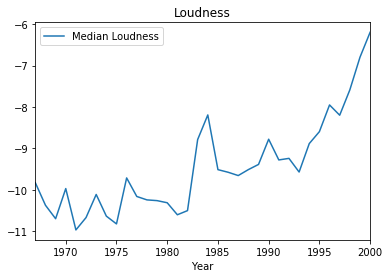

In [317]:
plot_1 = data.plot(x ='Year', y='Median Loudness', title='Loudness')
fig = plot_1.get_figure()
fig.savefig("grafica_1.png")

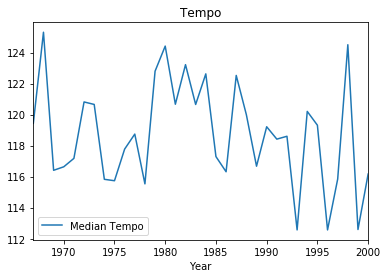

In [313]:
plot_2 = data.plot(x ='Year', y='Median Tempo', title ='Tempo')
fig = plot.get_figure()
fig.savefig("grafica_2.png")

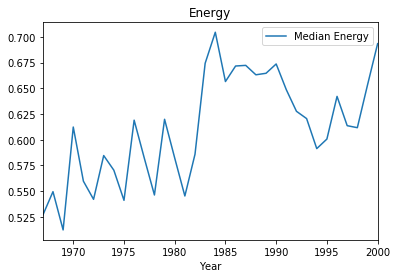

In [314]:
plot_3 = data.plot(x ='Year', y='Median Energy', title ='Energy')
fig = plot.get_figure()
fig.savefig("grafica_3.png")

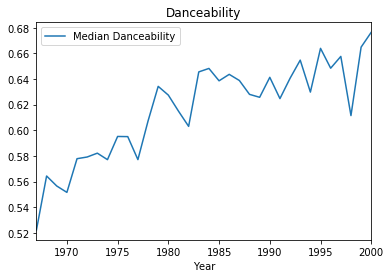

In [315]:
plot_4 = data.plot(x ='Year', y='Median Danceability', title ='Danceability')
fig = plot.get_figure()
fig.savefig("grafica_4.png")